## Vehicle Sales Data Jupyter Notebook


#### Download Data from kaggle


In [2]:
import kagglehub
import pathlib
import glob
import shutil
import os

os.makedirs("../Data", exist_ok=True)

if glob.glob(os.path.join('../Data', 'car_prices.csv')):
    print("Car_sales Data already exists")
else:
    download_path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")
    for file in os.listdir(download_path):
        if file.endswith(".csv"):
            shutil.move(os.path.join(download_path, file), "../Data")
            print(f"Moved {file} to ../Data")
            
    folder_path = pathlib.Path(download_path).resolve()

    for parent in folder_path.parents:
        if parent.name == 'vehicle-sales-data':
            remove_folder = str(parent)
            if os.path.exists(remove_folder):
                shutil.rmtree(remove_folder)
                print(f"removed data inside {pathlib.Path(remove_folder)}")
            else:
                print("Directory doesn't exist")

/Users/khaganshu/Projects/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Car_sales Data already exists


#### Load Data and Perform initial EDA

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("../Data/car_prices.csv")
df=data.copy()
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [5]:
df.shape

(558837, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [7]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [8]:
for col in df.columns:
    print("--------------------------")
    print(f"\n For Column: {col}\n")
    print(df[col].unique())
    print("\n")
    print(df[col].nunique())

--------------------------

 For Column: year

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]


34
--------------------------

 For Column: make

['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'm

In [9]:
columns=["make", "model", "trim", "color", "body", "transmission"]
for col in columns:
    df[col] = df[col].str.upper()


In [10]:
for col in df.columns:
    print("--------------------------")
    print(f"\n For Column: {col}\n")
    print(df[col].unique())
    print("\n")
    print(df[col].nunique())

--------------------------

 For Column: year

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]


34
--------------------------

 For Column: make

['KIA' 'BMW' 'VOLVO' 'NISSAN' 'CHEVROLET' 'AUDI' 'FORD' 'HYUNDAI' 'BUICK'
 'CADILLAC' 'ACURA' 'LEXUS' 'INFINITI' 'JEEP' 'MERCEDES-BENZ' 'MITSUBISHI'
 'MAZDA' 'MINI' 'LAND ROVER' 'LINCOLN' 'JAGUAR' 'VOLKSWAGEN' 'TOYOTA'
 'SUBARU' 'SCION' 'PORSCHE' nan 'DODGE' 'FIAT' 'CHRYSLER' 'FERRARI'
 'HONDA' 'GMC' 'RAM' 'SMART' 'BENTLEY' 'PONTIAC' 'SATURN' 'MASERATI'
 'MERCURY' 'HUMMER' 'LANDROVER' 'MERCEDES' 'GMC TRUCK' 'SAAB' 'SUZUKI'
 'OLDSMOBILE' 'ISUZU' 'DODGE TK' 'GEO' 'ROLLS-ROYCE' 'MAZDA TK'
 'HYUNDAI TK' 'MERCEDES-B' 'VW' 'DAEWOO' 'CHEV TRUCK' 'FORD TK' 'PLYMOUTH'
 'FORD TRUCK' 'TESLA' 'AIRSTREAM' 'DOT' 'ASTON MARTIN' 'FISKER'
 'LAMBORGHINI' 'LOTUS']


66
--------------------------

 For Column: model

['SORENTO' '3 SERIES

#### Generic function to view categorical data and numerical data Summary

In [11]:
def get_col_details(df):
    cat_dscr = df.describe(include="O").T
    num_dscr = df.describe().T

    categorical_summary = []
    numerical_summary = []

    for col in df.select_dtypes(include="O").columns:
        categorical_summary.append({
            "Column Name" : col,
            "Column dtype" : df[col].dtype,
            "Duplicate Values" : df[col].duplicated().sum(),
            "Unique Values" : df[col].nunique(),
            "Total Values" : df[col].shape[0],
            "Missing Values" : df[col].isnull().sum(),
            "Missing Values %": round(df[col].isnull().sum()/len(df[col] * 100),3),
            "Not_Null Values" : df[col].notnull().sum(),
            "Most Frequent Value" : df[col].mode()[0] if not df[col].mode().empty else None
        })

    for col in df.select_dtypes(exclude="O").columns:
        numerical_summary.append({
            "Column Name" : col,
            "Column dtype" : df[col].dtype,
            "Duplicate Values" : df[col].duplicated().sum(),
            "Unique Values" : df[col].nunique(),
            "Total Values" : df[col].shape[0],
            "Missing Values" : df[col].isnull().sum(),
            "Not_Null Values" : df[col].notnull().sum(),
        })

    categorical_summary_df = pd.DataFrame(categorical_summary)
    numerical_summary_df = pd.DataFrame(numerical_summary)

    categorical_summary_df = categorical_summary_df.merge(cat_dscr, how="left", right_index=True, left_on="Column Name")
    numerical_summary_df = numerical_summary_df.merge(num_dscr, how="left", right_index=True, left_on="Column Name")
    return categorical_summary_df, numerical_summary_df

In [12]:
categorical_summary_df, numerical_summary_df = get_col_details(df)
categorical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Missing Values %,Not_Null Values,Most Frequent Value,count,unique,top,freq
0,make,object,558770,66,558837,10301,0.018,548536,FORD,548536,66,FORD,93997
1,model,object,557985,851,558837,10399,0.019,548438,ALTIMA,548438,851,ALTIMA,19349
2,trim,object,556948,1888,558837,10651,0.019,548186,BASE,548186,1888,BASE,55842
3,body,object,558790,46,558837,13195,0.024,545642,SEDAN,545642,46,SEDAN,241343
4,transmission,object,558833,3,558837,65352,0.117,493485,AUTOMATIC,493485,3,AUTOMATIC,475915
5,vin,object,8539,550297,558837,4,0.000,558833,automatic,558833,550297,automatic,22
6,state,object,558773,64,558837,0,0.000,558837,fl,558837,64,fl,82945
7,color,object,558790,46,558837,749,0.001,558088,BLACK,558088,46,BLACK,110970
8,interior,object,558819,17,558837,749,0.001,558088,black,558088,17,black,244329
9,seller,object,544574,14263,558837,0,0.000,558837,nissan-infiniti lt,558837,14263,nissan-infiniti lt,19693


In [13]:
numerical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Not_Null Values,count,mean,std,min,25%,50%,75%,max
0,year,int64,558803,34,558837,0,558837,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
1,condition,float64,558795,41,558837,11820,547017,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
2,odometer,float64,386558,172278,558837,94,558743,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
3,mmr,float64,557735,1101,558837,38,558799,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
4,sellingprice,float64,556949,1887,558837,12,558825,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


#### DATA CLEANING and DATA MODIFICATION


In [14]:
df.duplicated().sum()

0

In [15]:
df.dropna(subset="vin", inplace=True)

In [16]:
df.shape

(558833, 16)

In [17]:
df[df["body"] == 'NAVITGATION']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700
424161,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250
427040,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300
427043,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,13850.0,14500
434424,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj7fm223475,NaN,46.0,15719,blue,black,NaN,13650.0,13500
444501,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj5fm297123,NaN,2.0,6388,white,black,NaN,13850.0,10700
453794,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj5fm219943,NaN,44.0,16633,silver,black,NaN,13600.0,13600
461597,2015,VOLKSWAGEN,JETTA,SE PZEV W/CONNECTIVITY,NAVITGATION,SEDAN,automatic,3vwd17aj9fm219766,NaN,44.0,11034,black,black,NaN,13900.0,13000


In [18]:
df.drop(df[df["body"] == 'NAVITGATION'].index, inplace=True)

In [19]:
df["wmi"]=df["vin"].str.slice(0,3)
df["vds"]=df["vin"].str.slice(3,8)

wmi_map = df.dropna(subset="make").set_index("wmi")["make"].to_dict()
vds_map = df.dropna(subset=["model", "trim", "body", "transmission"]).drop_duplicates(subset="vds", keep="first").set_index("vds")[["model", "trim", "body", "transmission"]].to_dict(orient="index")

In [20]:
wmi_map

{'5xy': 'KIA',
 'wba': 'BMW',
 'yv1': 'VOLVO',
 '1n4': 'NISSAN',
 'wbs': 'BMW',
 '1g1': 'CHEVROLET',
 'wau': 'AUDI',
 '2g1': 'CHEVROLET',
 '5xx': 'KIA',
 '3fa': 'FORD',
 '5np': 'HYUNDAI',
 'wa1': 'AUDI',
 'yv4': 'VOLVO',
 '5ux': 'BMW',
 '1g4': 'BUICK',
 '1gn': 'CHEVROLET',
 '1g6': 'CADILLAC',
 '19v': 'ACURA',
 'kna': 'KIA',
 '2t2': 'LEXUS',
 '3n1': 'NISSAN',
 '5ga': 'BUICK',
 'tru': 'AUDI',
 '1gc': 'CHEVROLET',
 '5fr': 'ACURA',
 '3gc': 'CHEVROLET',
 '3gy': 'CADILLAC',
 'jn1': 'INFINITI',
 'jn8': 'NISSAN',
 'km8': 'HYUNDAI',
 'kmh': 'HYUNDAI',
 '1c4': 'JEEP',
 'wdd': 'MERCEDES-BENZ',
 'jth': 'LEXUS',
 'ja4': 'MITSUBISHI',
 'jm1': 'MAZDA',
 'knd': 'KIA',
 '4a4': 'MITSUBISHI',
 'wmw': 'MINI',
 'jm3': 'MAZDA',
 '5n1': 'NISSAN',
 'jtj': 'LEXUS',
 'sal': 'LAND ROVER',
 'wdc': 'MERCEDES-BENZ',
 '2lm': 'LINCOLN',
 'saj': 'JAGUAR',
 '4jg': 'MERCEDES-BENZ',
 'ja3': 'MITSUBISHI',
 '1vw': 'VOLKSWAGEN',
 '5yf': 'TOYOTA',
 '5td': 'TOYOTA',
 'jtd': 'TOYOTA',
 '1n6': 'NISSAN',
 '2t1': 'TOYOTA',
 'wvw'

In [21]:
vds_map

{'ktca6': {'model': 'SORENTO',
  'trim': 'LX',
  'body': 'SUV',
  'transmission': 'AUTOMATIC'},
 '3c1c5': {'model': '3 SERIES',
  'trim': '328I SULEV',
  'body': 'SEDAN',
  'transmission': 'AUTOMATIC'},
 '612tb': {'model': 'S60',
  'trim': 'T5',
  'body': 'SEDAN',
  'transmission': 'AUTOMATIC'},
 '6b2c5': {'model': '6 SERIES GRAN COUPE',
  'trim': '650I',
  'body': 'SEDAN',
  'transmission': 'AUTOMATIC'},
 'al3ap': {'model': 'ALTIMA',
  'trim': '2.5 S',
  'body': 'SEDAN',
  'transmission': 'AUTOMATIC'},
 'fv9c5': {'model': 'M5',
  'trim': 'BASE',
  'body': 'SEDAN',
  'transmission': 'AUTOMATIC'},
 'pc5sb': {'model': 'CRUZE',
  'trim': '1LT',
  'body': 'SEDAN',
  'transmission': 'AUTOMATIC'},
 'ffafl': {'model': 'A4',
  'trim': '2.0T PREMIUM PLUS QUATTRO',
  'body': 'SEDAN',
  'transmission': 'AUTOMATIC'},
 'fb3d3': {'model': 'CAMARO',
  'trim': 'LT',
  'body': 'CONVERTIBLE',
  'transmission': 'AUTOMATIC'},
 'hgafc': {'model': 'A6',
  'trim': '3.0T PRESTIGE QUATTRO',
  'body': 'SEDAN',


In [22]:
def fill_column_missing_data(row):
    if pd.isna(row["make"]) and row["wmi"] in wmi_map:
        row["make"] = wmi_map[row["wmi"]]
    if row["vds"] in vds_map:
        for col in ["model", "body", "trim", "transmission"]:
            if pd.isna(row[col]) and col in vds_map[row["vds"]]:
                row[col] = vds_map[row["vds"]][col] 
    return row

In [23]:
df = df.apply(fill_column_missing_data, axis=1)

In [24]:
categorical_summary_df, numerical_summary_df = get_col_details(df)
categorical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Missing Values %,Not_Null Values,Most Frequent Value,count,unique,top,freq
0,make,object,558744,66,558811,22,0.000,558789,FORD,558789,66,FORD,95593
1,model,object,557959,851,558811,3879,0.007,554932,ALTIMA,554932,851,ALTIMA,19349
2,trim,object,556923,1887,558811,4021,0.007,554790,BASE,554790,1887,BASE,56657
3,body,object,558765,45,558811,4873,0.009,553938,SEDAN,553938,45,SEDAN,242844
4,transmission,object,558808,2,558811,1304,0.002,557507,AUTOMATIC,557507,2,AUTOMATIC,538241
5,vin,object,8515,550296,558811,0,0.000,558811,wbanv13588cz57827,558811,550296,wbanv13588cz57827,5
6,state,object,558773,38,558811,0,0.000,558811,fl,558811,38,fl,82945
7,color,object,558790,20,558811,749,0.001,558062,BLACK,558062,20,BLACK,110970
8,interior,object,558793,17,558811,749,0.001,558062,black,558062,17,black,244325
9,seller,object,544550,14261,558811,0,0.000,558811,nissan-infiniti lt,558811,14261,nissan-infiniti lt,19693


In [25]:
import requests

def fetch_vehicle_details(vin):
    url = f"https://vpic.nhtsa.dot.gov/api/vehicles/decodevin/{vin}?format=json"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        results = {item['Variable']: item['Value'] for item in data['Results'] if item['Value']}
        
        return {
            "make": results.get("Make"),
            "model": results.get("Model"),
            "body": results.get("Body Class"),
            "trim": results.get("Trim"),
            "transmission": results.get("Transmission Style")
        }
    return {}

vehicle_columns = ["make", "model", "body", "trim", "transmission"]

count=0
for index, row in df.iterrows():
    if pd.isna(row["make"]):
        vin_details = fetch_vehicle_details(row["vin"])
        for col in vehicle_columns:
            if pd.isna(row[col]) and col in vin_details:
                df.at[index, col] = vin_details[col]
        count += 1
print(count)
print(df)

22
        year    make                model         trim       body  \
0       2015     KIA              SORENTO           LX        SUV   
1       2015     KIA              SORENTO           LX        SUV   
2       2014     BMW             3 SERIES   328I SULEV      SEDAN   
3       2015   VOLVO                  S60           T5      SEDAN   
4       2014     BMW  6 SERIES GRAN COUPE         650I      SEDAN   
...      ...     ...                  ...          ...        ...   
558832  2015     KIA                 K900       LUXURY      SEDAN   
558833  2012     RAM                 2500  POWER WAGON   CREW CAB   
558834  2012     BMW                   X5    XDRIVE35D        SUV   
558835  2015  NISSAN               ALTIMA        2.5 S      SEDAN   
558836  2014    FORD                F-150          XLT  SUPERCREW   

       transmission                vin state  condition  odometer   color  \
0         AUTOMATIC  5xyktca69fg566472    ca        5.0   16639.0   WHITE   
1         AUTO

In [26]:
categorical_summary_df, numerical_summary_df = get_col_details(df)
categorical_summary_df


,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Missing Values %,Not_Null Values,Most Frequent Value,count,unique,top,freq
0,make,object,558744,67,558811,0,0.000,558811,FORD,558811,67,FORD,95594
1,model,object,557952,858,558811,3868,0.007,554943,ALTIMA,554943,858,ALTIMA,19349
2,trim,object,556919,1890,558811,4012,0.007,554799,BASE,554799,1890,BASE,56657
3,body,object,558760,50,558811,4862,0.009,553949,SEDAN,553949,50,SEDAN,242844
4,transmission,object,558808,2,558811,1304,0.002,557507,AUTOMATIC,557507,2,AUTOMATIC,538241
5,vin,object,8515,550296,558811,0,0.000,558811,wbanv13588cz57827,558811,550296,wbanv13588cz57827,5
6,state,object,558773,38,558811,0,0.000,558811,fl,558811,38,fl,82945
7,color,object,558790,20,558811,749,0.001,558062,BLACK,558062,20,BLACK,110970
8,interior,object,558793,17,558811,749,0.001,558062,black,558062,17,black,244325
9,seller,object,544550,14261,558811,0,0.000,558811,nissan-infiniti lt,558811,14261,nissan-infiniti lt,19693


In [27]:
numerical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Not_Null Values,count,mean,std,min,25%,50%,75%,max
0,year,int64,558777,34,558811,0,558811,558811.0,2010.038696,3.966812,1982.0,2007.0,2012.0,2013.0,2015.0
1,condition,float64,558769,41,558811,11794,547017,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
2,odometer,float64,386533,172277,558811,94,558717,558717.0,68323.195797,53397.752933,1.0,28374.0,52256.0,99112.0,999999.0
3,mmr,float64,557709,1101,558811,12,558799,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
4,sellingprice,float64,556923,1887,558811,12,558799,558799.0,13611.356296,9749.728196,1.0,6900.0,12100.0,18200.0,230000.0


In [28]:
import warnings
warnings.filterwarnings('ignore')


df["condition"].fillna(df["condition"].median(), inplace = True)
df["odometer"].fillna(df["odometer"].median(), inplace = True)
df["mmr"].fillna(df["mmr"].mode()[0], inplace = True)
df["sellingprice"].fillna(df["sellingprice"].mode()[0], inplace = True)


In [29]:
df.dropna(subset=["model", "body", "trim", "transmission", "saledate"], inplace=True)
df["color"].fillna(df["color"].mode()[0], inplace = True)
df["interior"].fillna(df["interior"].mode()[0], inplace = True)



In [30]:
categorical_summary_df, numerical_summary_df = get_col_details(df)
categorical_summary_df


,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Missing Values %,Not_Null Values,Most Frequent Value,count,unique,top,freq
0,make,object,553558,64,553622,0,0.0,553622,FORD,553622,64,FORD,95063
1,model,object,552796,826,553622,0,0.0,553622,ALTIMA,553622,826,ALTIMA,19347
2,trim,object,551844,1778,553622,0,0.0,553622,BASE,553622,1778,BASE,56622
3,body,object,553573,49,553622,0,0.0,553622,SEDAN,553622,49,SEDAN,242752
4,transmission,object,553620,2,553622,0,0.0,553622,AUTOMATIC,553622,2,AUTOMATIC,534712
5,vin,object,8451,545171,553622,0,0.0,553622,wbanv13588cz57827,553622,545171,wbanv13588cz57827,5
6,state,object,553584,38,553622,0,0.0,553622,fl,553622,38,fl,82200
7,color,object,553602,20,553622,0,0.0,553622,BLACK,553622,20,BLACK,110794
8,interior,object,553605,17,553622,0,0.0,553622,black,553622,17,black,242796
9,seller,object,539482,14140,553622,0,0.0,553622,nissan-infiniti lt,553622,14140,nissan-infiniti lt,19693


In [31]:
numerical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Not_Null Values,count,mean,std,min,25%,50%,75%,max
0,year,int64,553593,29,553622,0,553622,553622.0,2010.076016,3.928165,1985.0,2008.0,2012.0,2013.00,2015.0
1,condition,float64,553581,41,553622,0,553622,553622.0,30.823876,13.249181,1.0,24.0,35.0,41.00,49.0
2,odometer,float64,382363,171259,553622,0,553622,553622.0,67966.584294,53172.667869,1.0,28269.0,51864.0,98602.75,999999.0
3,mmr,float64,552522,1100,553622,0,553622,553622.0,13831.561517,9673.016818,25.0,7225.0,12300.0,18350.00,182000.0
4,sellingprice,float64,551738,1884,553622,0,553622,553622.0,13673.131971,9743.168945,1.0,7000.0,12200.0,18250.00,230000.0


In [32]:
df.shape

(553622, 18)

In [33]:
df["condition"].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 35., 49., 17.,
       19., 29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46.,
       36., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12., 14.,
       11., 13.])

In [34]:
df["condition"] = df["condition"] / 10

In [35]:
df["condition"].unique()

array([0.5, 4.5, 4.1, 4.3, 0.1, 3.4, 0.2, 4.2, 0.3, 4.8, 3.5, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 0.4, 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2, 1.4,
       1.1, 1.3])

In [36]:
df["body"].unique()

array(['SUV', 'SEDAN', 'CONVERTIBLE', 'COUPE', 'WAGON', 'HATCHBACK',
       'CREW CAB', 'G COUPE', 'G SEDAN', 'ELANTRA COUPE', 'GENESIS COUPE',
       'MINIVAN', 'VAN', 'DOUBLE CAB', 'CREWMAX CAB', 'ACCESS CAB',
       'KING CAB', 'SUPERCREW', 'CTS COUPE', 'EXTENDED CAB',
       'E-SERIES VAN', 'SUPERCAB', 'REGULAR CAB', 'G CONVERTIBLE', 'KOUP',
       'QUAD CAB', 'CTS-V COUPE', 'G37 CONVERTIBLE', 'CLUB CAB',
       'XTRACAB', 'Q60 CONVERTIBLE', 'CTS WAGON', 'G37 COUPE', 'MEGA CAB',
       'CAB PLUS 4', 'Q60 COUPE', 'CAB PLUS', 'BEETLE CONVERTIBLE',
       'TSX SPORT WAGON', 'PROMASTER CARGO VAN',
       'GRANTURISMO CONVERTIBLE', 'CTS-V WAGON', 'RAM VAN', 'Pickup',
       'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)',
       'Incomplete - Chassis Cab (Single Cab)', 'TRANSIT VAN',
       'Sedan/Saloon', 'REGULAR-CAB'], dtype=object)

In [37]:
def get_body_type(body):
    if "CAB" in body:
        return "CAB"
    if "CONVERTIBLE" in body:
        return "CONVERTIBLE"
    if "COUPE" in body:
        return "COUPE"
    if "SEDAN" in body:
        return "SEDAN"
    if "WAGON" in body:
        return "WAGON"
    if "VAN" in body:
        return "VAN"
    if "SUV" in body:
        return "SUV"
    if "PICKUP" in body:
        return "PICKUP"
    if 'Incomplete - Chassis Cab (Single Cab)' in body:
        return "CAB"
    if 'Sedan/Saloon' in body:
        return "SEDAN"
    if 'Pickup' in body:
        return "PICKUP"
    if "KOUP" in body:
        return "COUPE"
    if "SUPERCREW" in body:
        return "PICKUP"
    return body
# if df["body"].str.contains("CAB"):
#     df["body"] = "CAB"
# if df["body"].str.contains("CONVERTIBLE"):
#     df["body"] = "CONVERTIBLE"
# if df["body"].str.contains("COUPE"):
#     df["body"] = "COUPE"
# if df["body"].str.contains("SEDAN"):
#     df["body"] = "SEDAN"
# if df["body"].str.contains("WAGON"):
#     df["body"] = "WAGON"
# if df["body"].str.contains("VAN"):
#     df["body"] = "VAN"
# if df["body"].str.contains("SUV"):
#     df["body"] = "SUV"

df["body"] = df["body"].apply(get_body_type)

In [38]:
df["body"].unique()

array(['SUV', 'SEDAN', 'CONVERTIBLE', 'COUPE', 'WAGON', 'HATCHBACK',
       'CAB', 'VAN', 'PICKUP'], dtype=object)

In [39]:
df[df["body"] == 'PICKUP']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,wmi,vds
983,2012,FORD,F-150,XLT,PICKUP,AUTOMATIC,1ftew1cm9ckd05952,ca,4.6,51189.0,GRAY,gray,ford motor credit company llc pd,19700.0,20200.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),1ft,ew1cm
1013,2012,FORD,F-150,FX2,PICKUP,AUTOMATIC,1ftfw1ct0cfb64807,ca,4.6,28687.0,GRAY,black,ford motor credit company llc pd,26700.0,30500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),1ft,fw1ct
1052,2012,FORD,F-150,XLT,PICKUP,AUTOMATIC,1ftfw1et3ckd61619,ca,3.9,27465.0,BLACK,gray,ford motor credit company llc pd,26300.0,28800.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),1ft,fw1et
1054,2012,FORD,F-150,XLT,PICKUP,AUTOMATIC,1ftfw1ef9cfc79834,ca,3.5,93858.0,WHITE,gray,aaero sweet company,18900.0,19500.0,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),1ft,fw1ef
1950,2011,FORD,F-150,FX2,PICKUP,AUTOMATIC,1ftfw1cf3bke02634,ca,3.5,62174.0,SILVER,black,ford motor credit company llc,19750.0,20900.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),1ft,fw1cf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558485,2014,FORD,F-150,XLT,PICKUP,AUTOMATIC,1ftfw1ef1efa32973,pa,4.9,31623.0,WHITE,gray,usautoland inc,27500.0,26800.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),1ft,fw1ef
558504,2013,FORD,F-150,XLT,PICKUP,AUTOMATIC,1ftfw1ef9dfa32931,pa,4.7,38953.0,GRAY,gray,usautoland inc,25300.0,25500.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),1ft,fw1ef
558558,2012,FORD,F-150,PLATINUM,PICKUP,AUTOMATIC,1ftfw1et8cfa00587,pa,4.1,51994.0,WHITE,black,r hollenshead auto sales inc,31700.0,29400.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),1ft,fw1et
558600,2008,FORD,F-150,FX4,PICKUP,AUTOMATIC,1ftpw14v98fa62904,nv,3.8,79088.0,WHITE,beige,unique autos,17500.0,18700.0,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT),1ft,pw14v


In [40]:
df["color"].unique()

array(['WHITE', 'GRAY', 'BLACK', 'RED', 'SILVER', 'BLUE', 'BROWN',
       'BEIGE', 'PURPLE', 'BURGUNDY', '—', 'GOLD', 'YELLOW', 'GREEN',
       'CHARCOAL', 'ORANGE', 'OFF-WHITE', 'TURQUOISE', 'PINK', 'LIME'],
      dtype=object)

In [41]:
# df["color"] = df["color"].replace('-', 'unknown')
# def fill_unknown_color(color):
#     if '-' in color:
#         return "unknown"
#     return color

# df["color"] = df["color"].apply(fill_unknown_color)

In [42]:
# df["color"].unique()

In [43]:
df["interior"].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       'silver', 'off-white', 'blue', 'red', 'yellow', 'green', 'purple',
       'orange', 'gold'], dtype=object)

In [44]:
# df["interior"] = df["interior"].str.replace("-", "unknown")

In [45]:
# df["saledate"] = pd.to_datetime(df["saledate"], errors='coerce')
# df["sale_year"] = df["saledate"].dt.year.astype("Int64")
# df["sale_year"].unique()

df["sale_year"] = df["saledate"].str.slice(11,15).astype("Int64")

In [46]:
df["sale_year"].unique()

<IntegerArray>
[2014, 2015]
Length: 2, dtype: Int64

In [47]:
df.rename(columns={"year": "mfg_year"}, inplace=True)

In [48]:
df.drop(["vds", "wmi", "saledate", "seller", "vin"], inplace=True, axis=1)

In [49]:
categorical_summary_df, numerical_summary_df = get_col_details(df)
categorical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Missing Values %,Not_Null Values,Most Frequent Value,count,unique,top,freq
0,make,object,553558,64,553622,0,0.0,553622,FORD,553622,64,FORD,95063
1,model,object,552796,826,553622,0,0.0,553622,ALTIMA,553622,826,ALTIMA,19347
2,trim,object,551844,1778,553622,0,0.0,553622,BASE,553622,1778,BASE,56622
3,body,object,553613,9,553622,0,0.0,553622,SEDAN,553622,9,SEDAN,250170
4,transmission,object,553620,2,553622,0,0.0,553622,AUTOMATIC,553622,2,AUTOMATIC,534712
5,state,object,553584,38,553622,0,0.0,553622,fl,553622,38,fl,82200
6,color,object,553602,20,553622,0,0.0,553622,BLACK,553622,20,BLACK,110794
7,interior,object,553605,17,553622,0,0.0,553622,black,553622,17,black,242796


In [50]:
numerical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Not_Null Values,count,mean,std,min,25%,50%,75%,max
0,mfg_year,int64,553593,29,553622,0,553622,553622.0,2010.076016,3.928165,1985.0,2008.0,2012.0,2013.0,2015.0
1,condition,float64,553581,41,553622,0,553622,553622.0,3.082388,1.324918,0.1,2.4,3.5,4.1,4.9
2,odometer,float64,382363,171259,553622,0,553622,553622.0,67966.584294,53172.667869,1.0,28269.0,51864.0,98602.75,999999.0
3,mmr,float64,552522,1100,553622,0,553622,553622.0,13831.561517,9673.016818,25.0,7225.0,12300.0,18350.0,182000.0
4,sellingprice,float64,551738,1884,553622,0,553622,553622.0,13673.131971,9743.168945,1.0,7000.0,12200.0,18250.0,230000.0
5,sale_year,Int64,553620,2,553622,0,553622,553622.0,2014.904045,0.29453,2014.0,2015.0,2015.0,2015.0,2015.0


#### Data Visualization

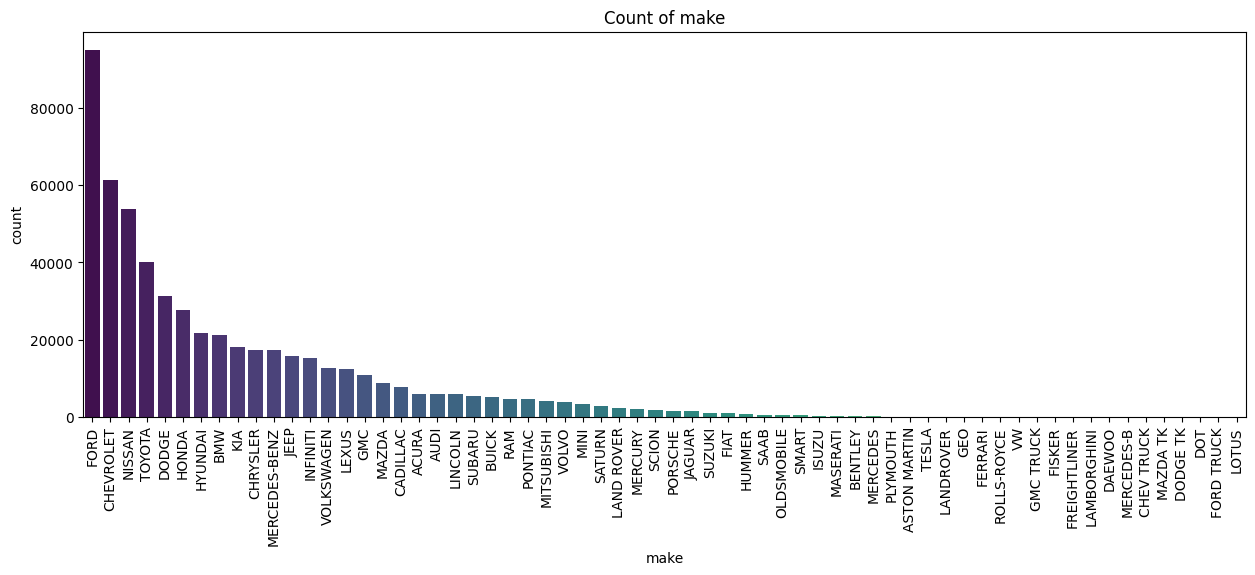

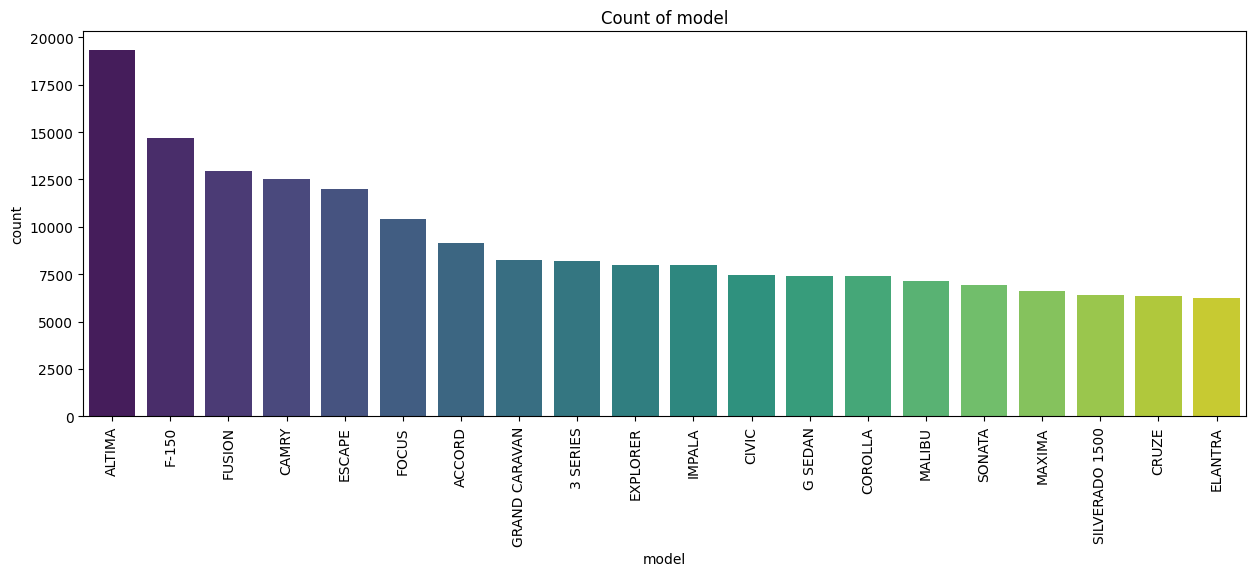

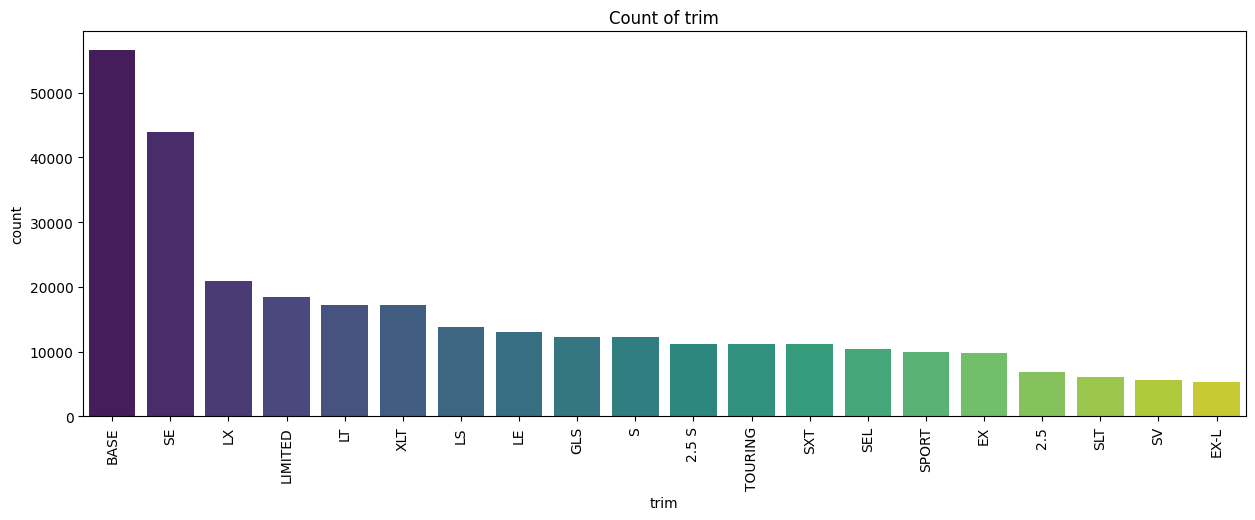

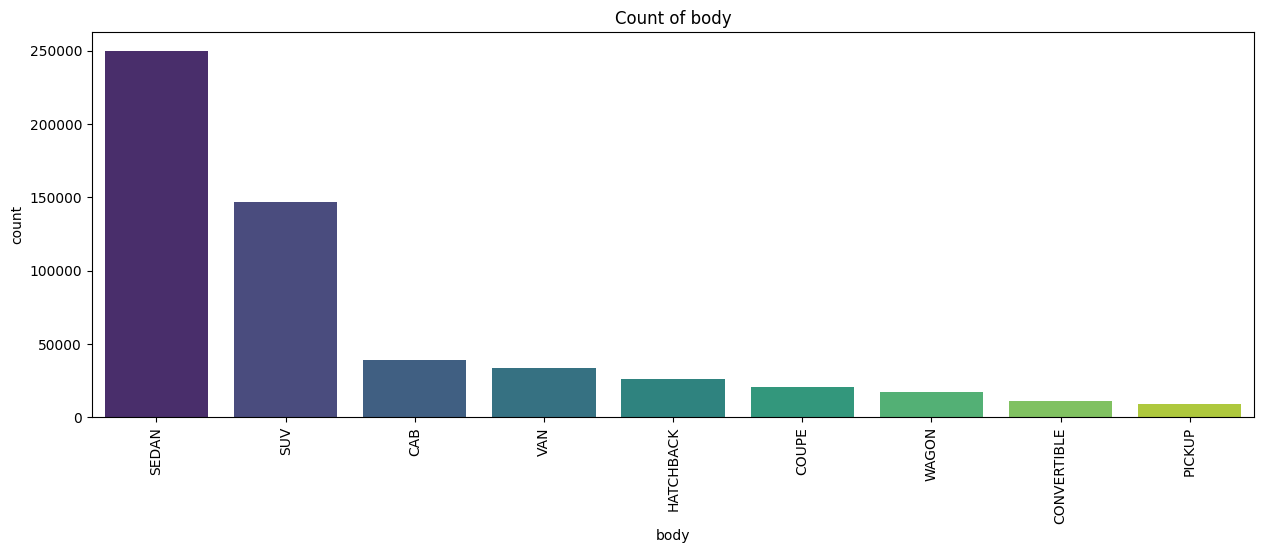

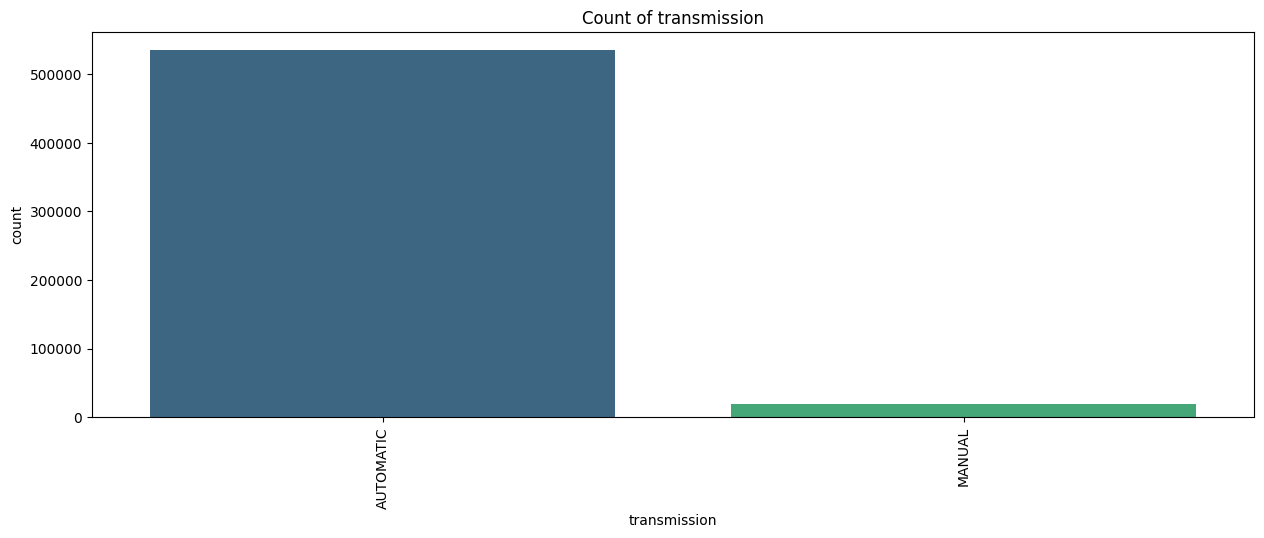

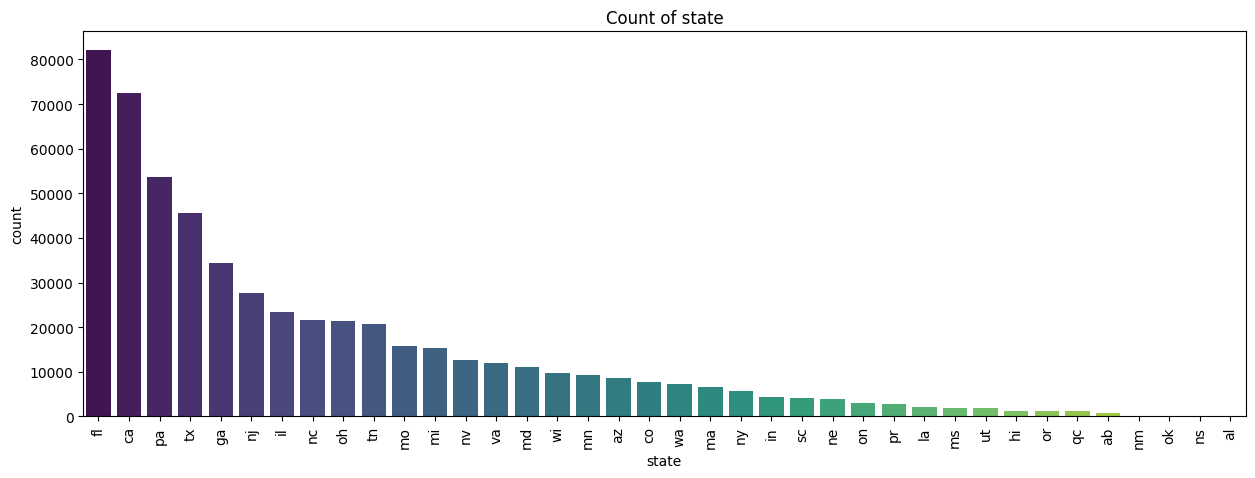

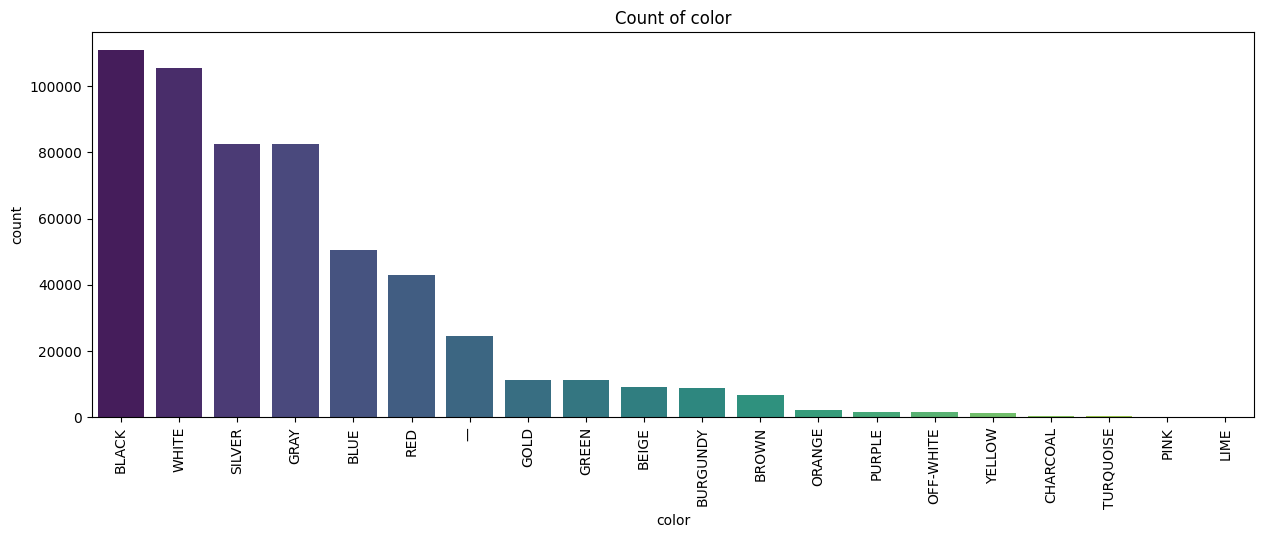

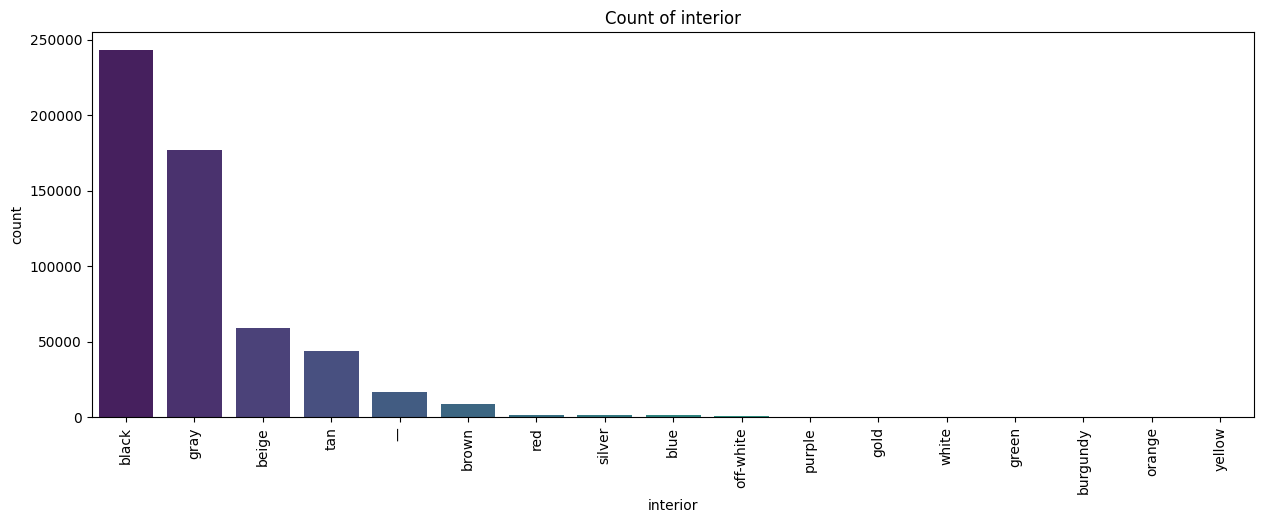

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include="O").columns:
    plt.figure(figsize=(15,5))
    plt.title(f"Count of {col}")
    if col == "trim" or col == "model":
        sns.countplot(data=df, x=col, order=df[col].value_counts().index[:20], palette="viridis")
    else:
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=90)
    plt.show()

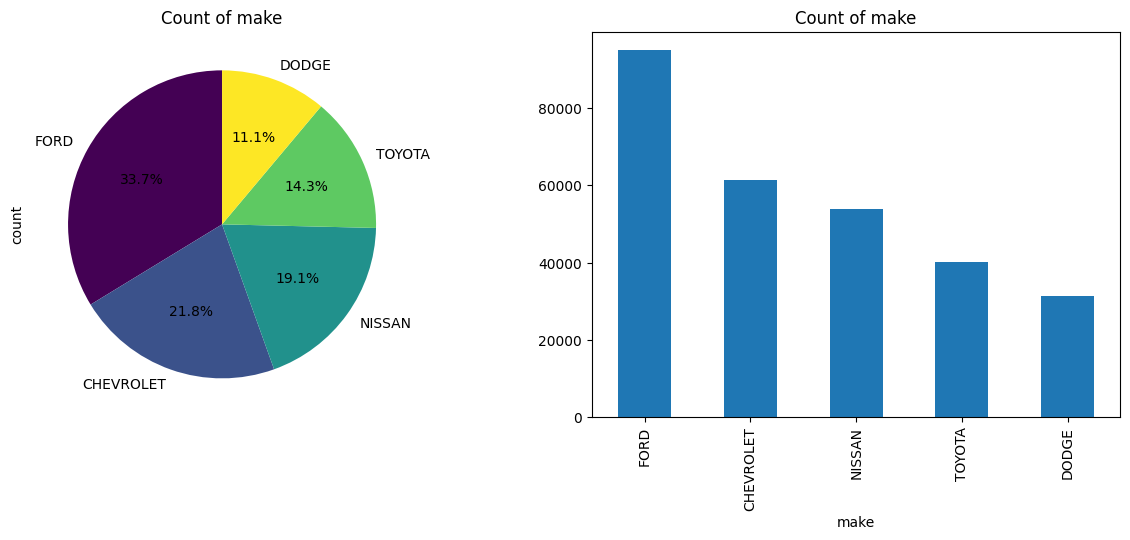

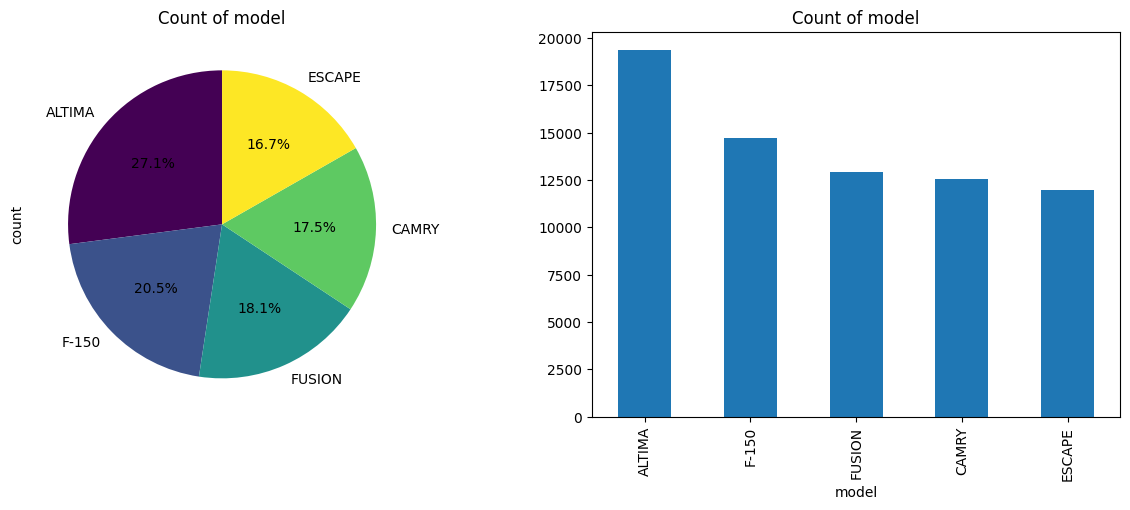

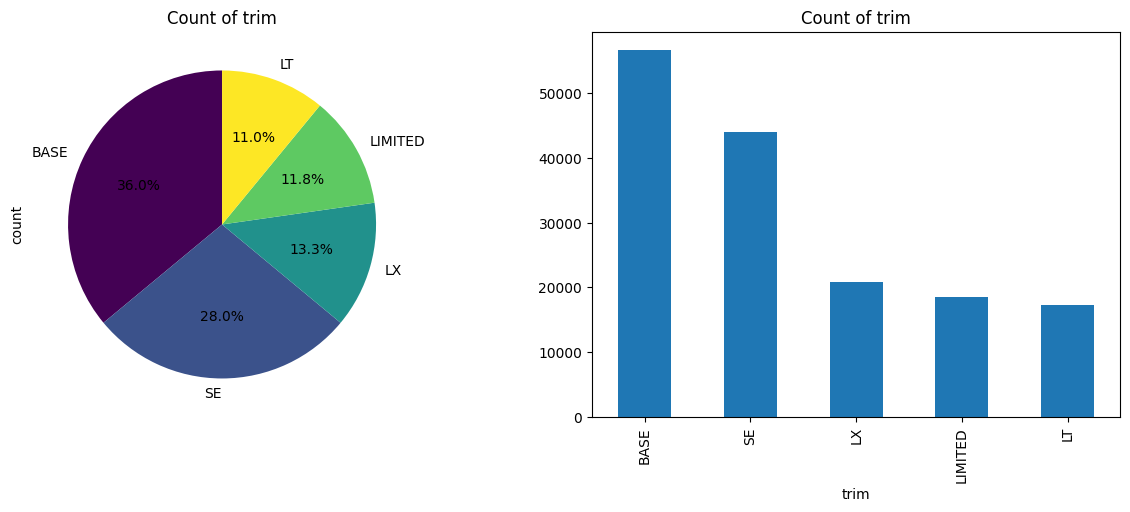

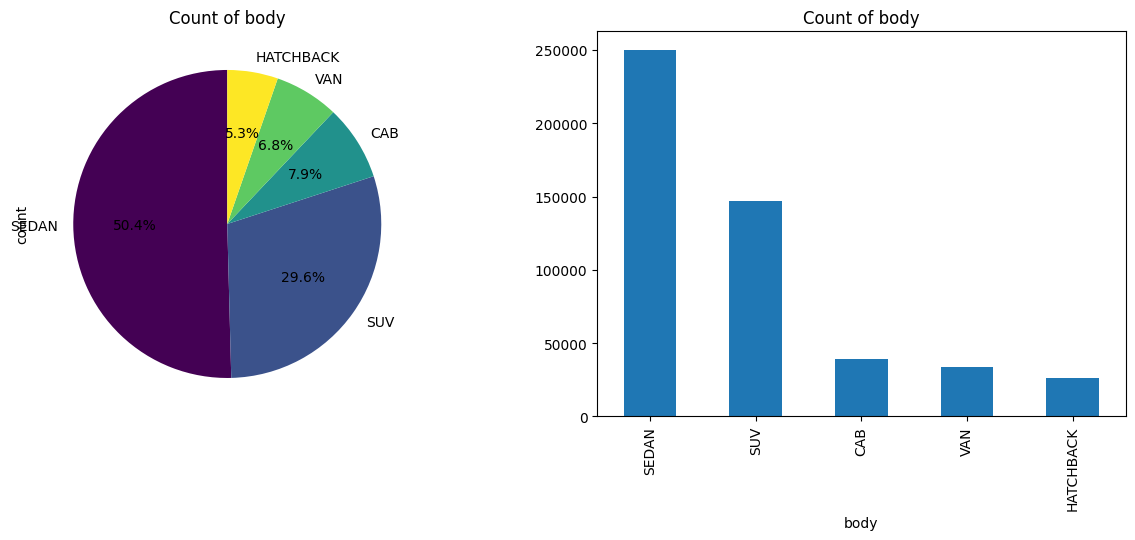

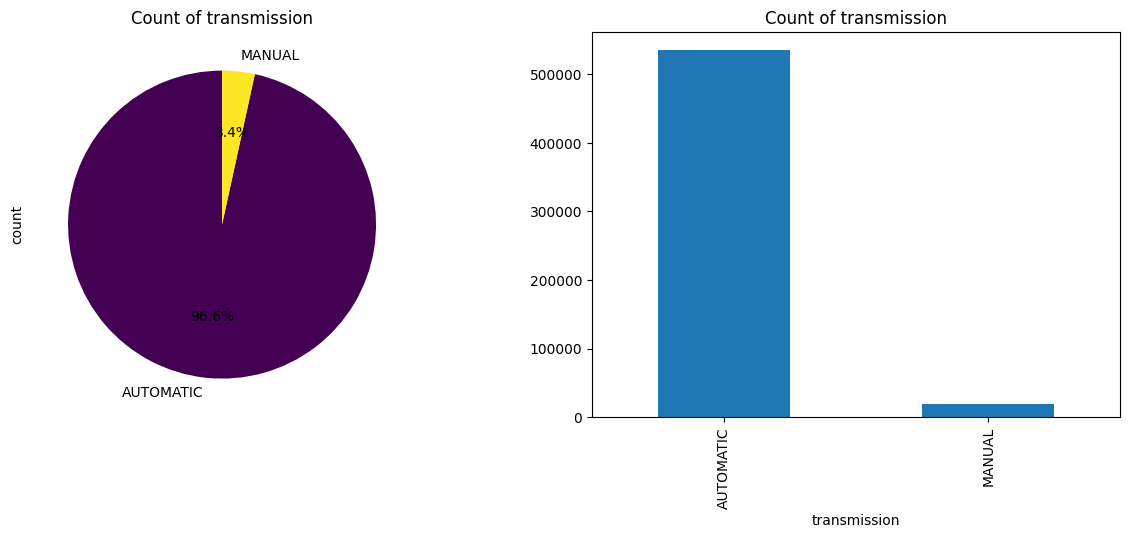

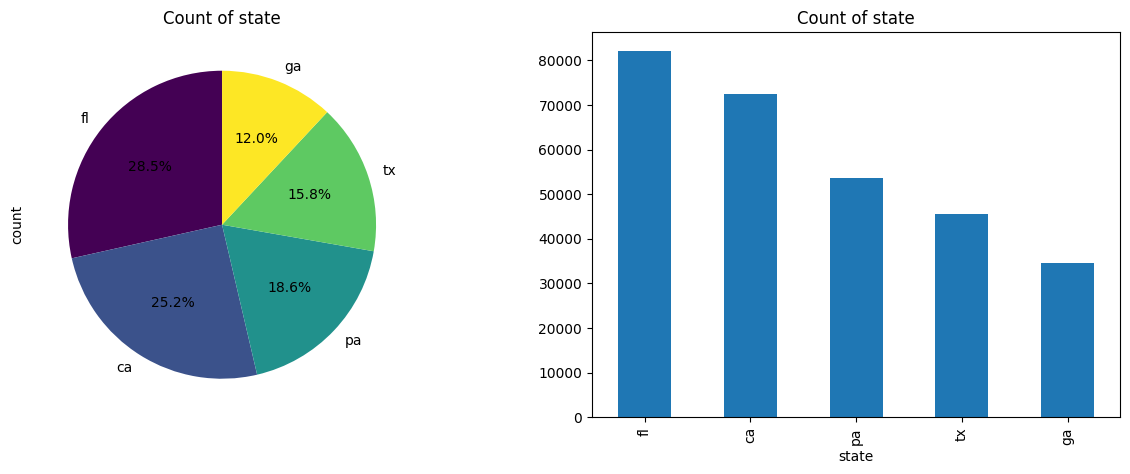

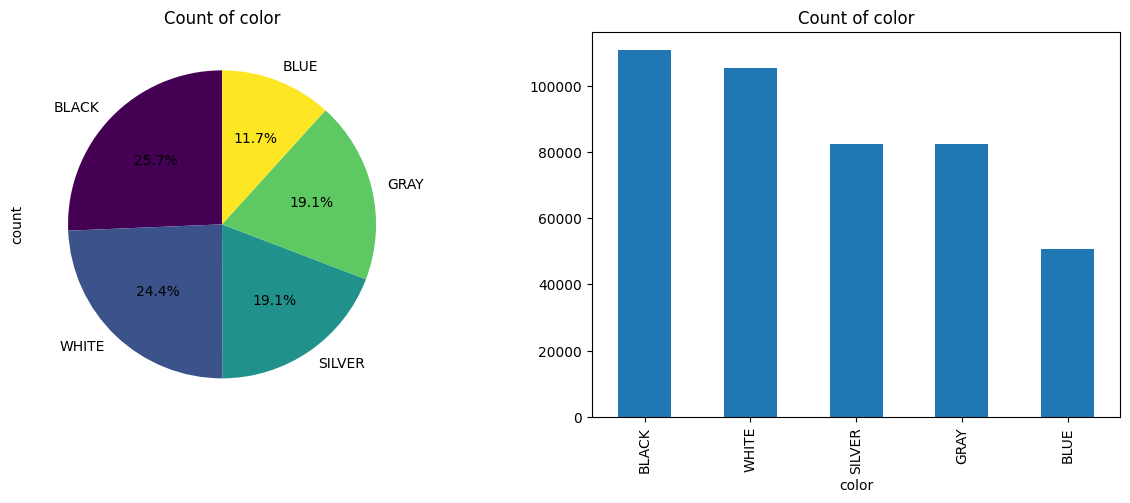

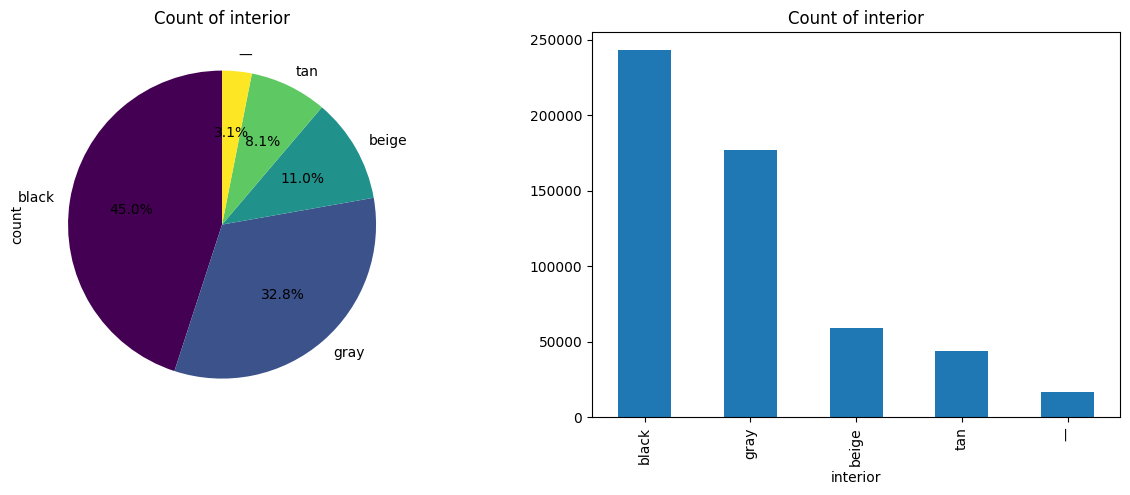

In [52]:
#pie plot for all categorical columns till top 5 values with two pie charts in a row

for col in df.select_dtypes(include="O").columns:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title(f"Count of {col}")
    df[col].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.subplot(1,2,2)
    plt.title(f"Count of {col}")
    df[col].value_counts().head(5).plot(kind="bar")
    plt.show()

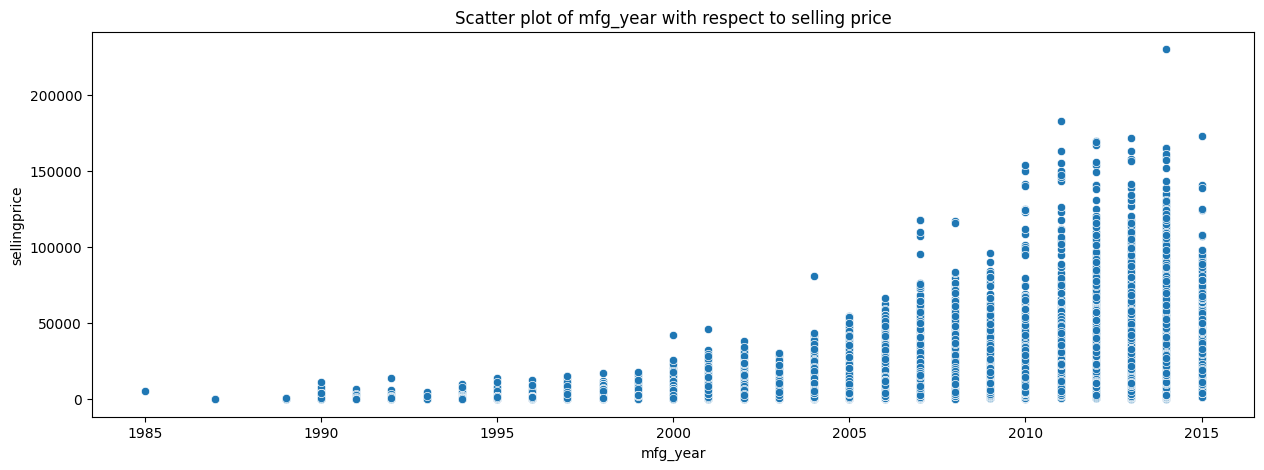

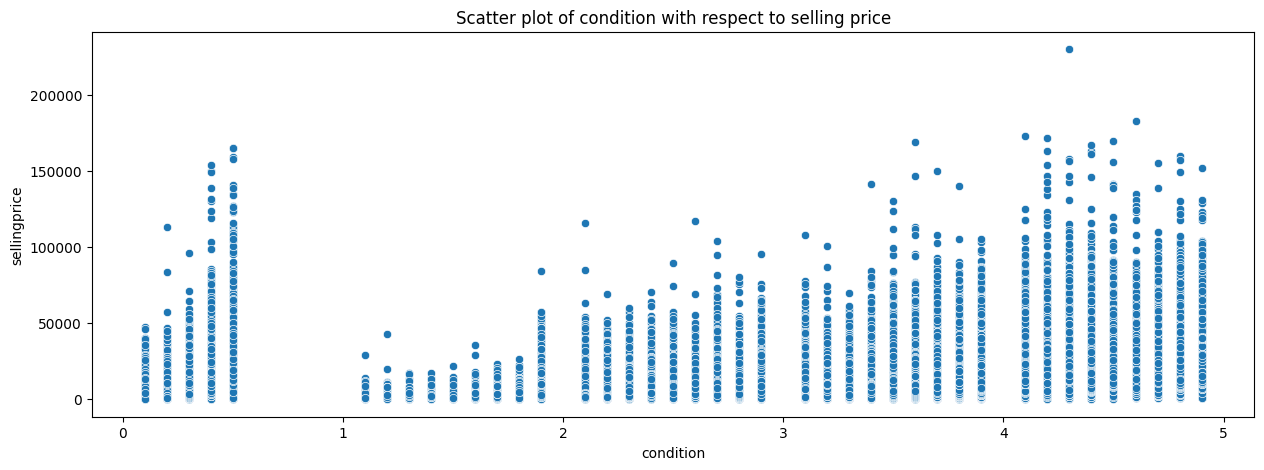

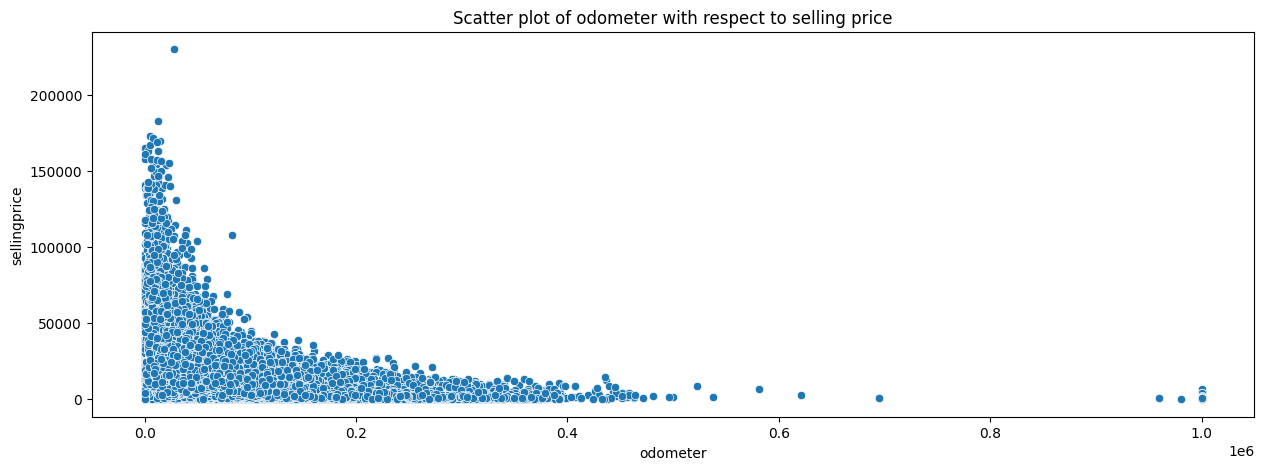

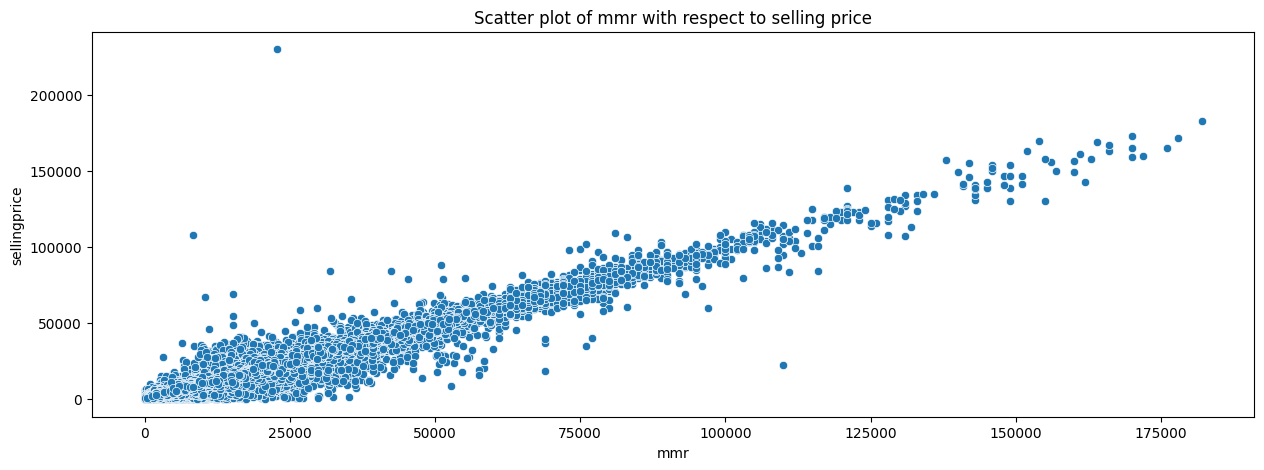

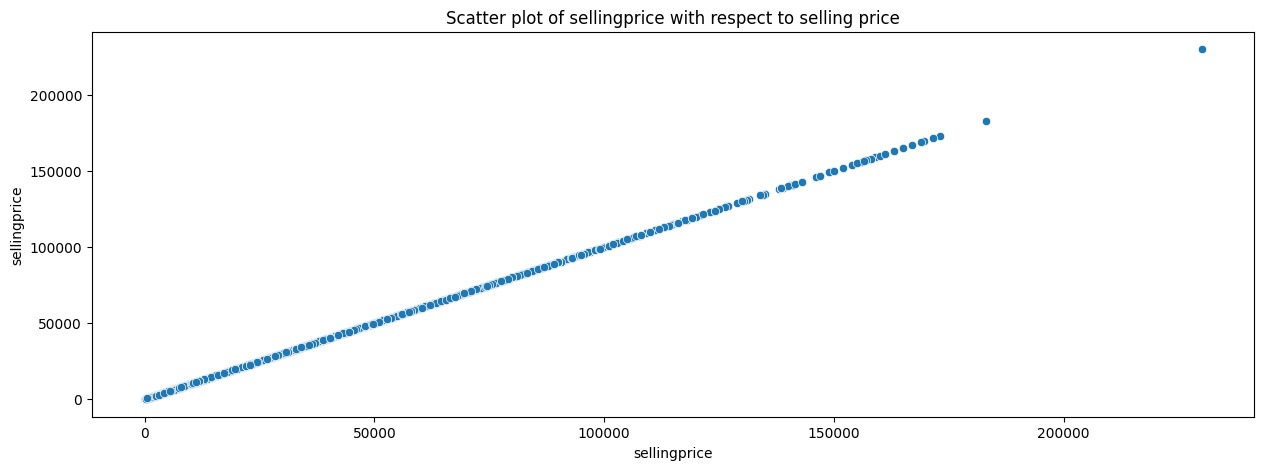

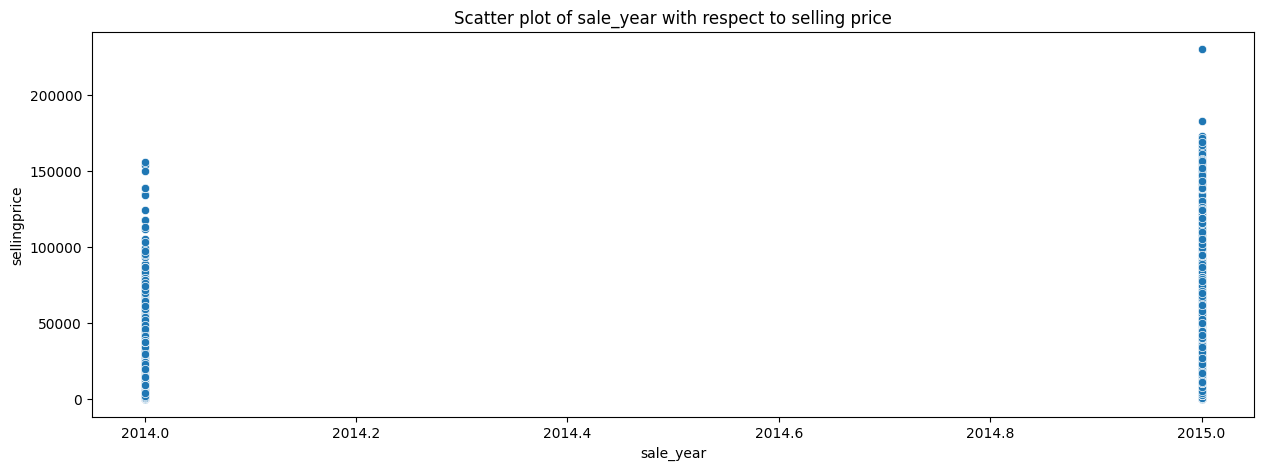

In [53]:
# scatter plot for all columns with respect to selling price

for col in df.select_dtypes(exclude="O").columns:
    plt.figure(figsize=(15,5))
    plt.title(f"Scatter plot of {col} with respect to selling price")
    sns.scatterplot(data=df, x=col, y="sellingprice", palette="viridis")
    plt.show()


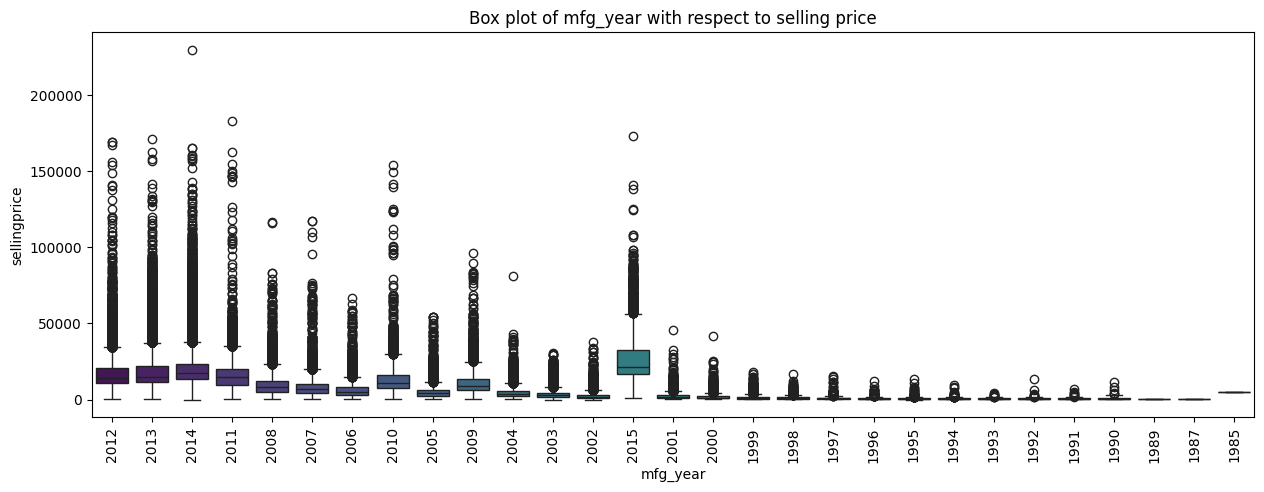

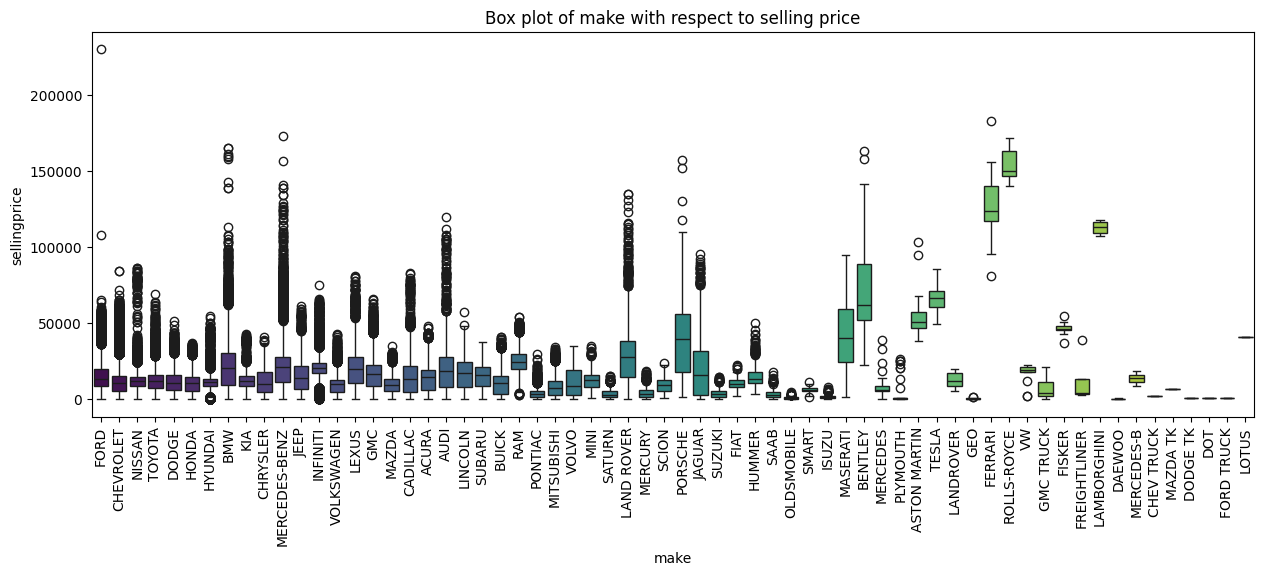

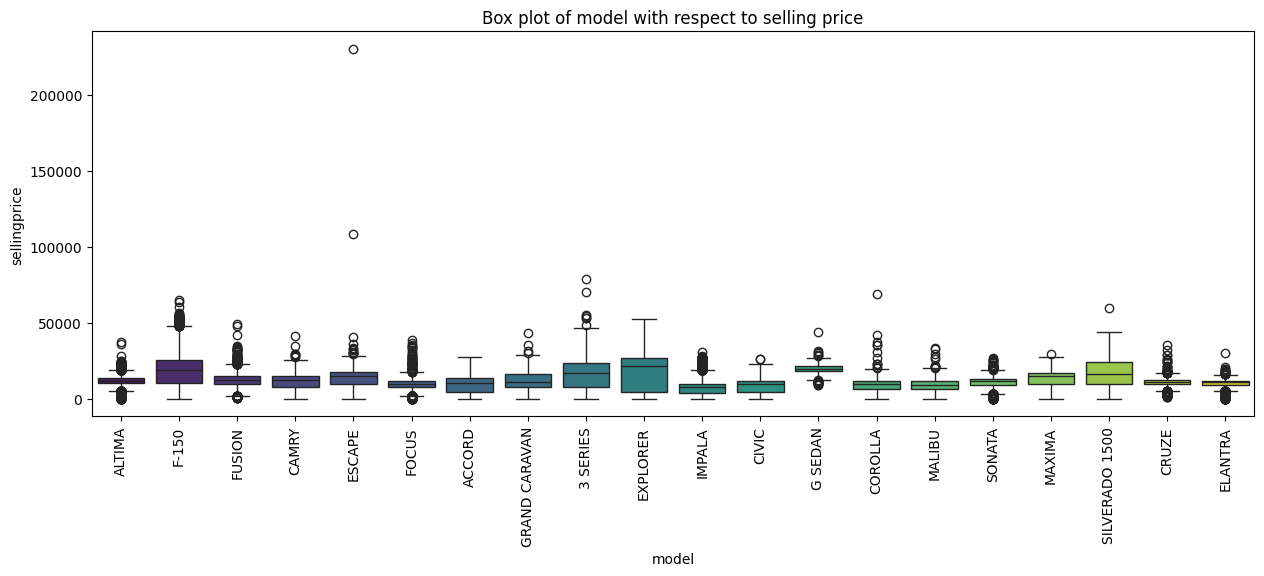

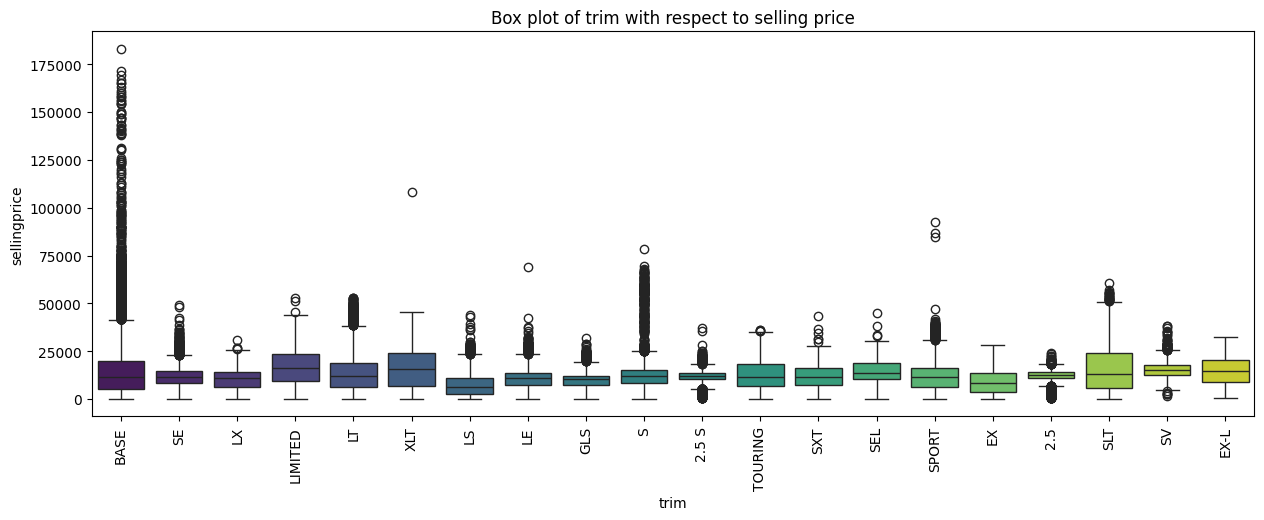

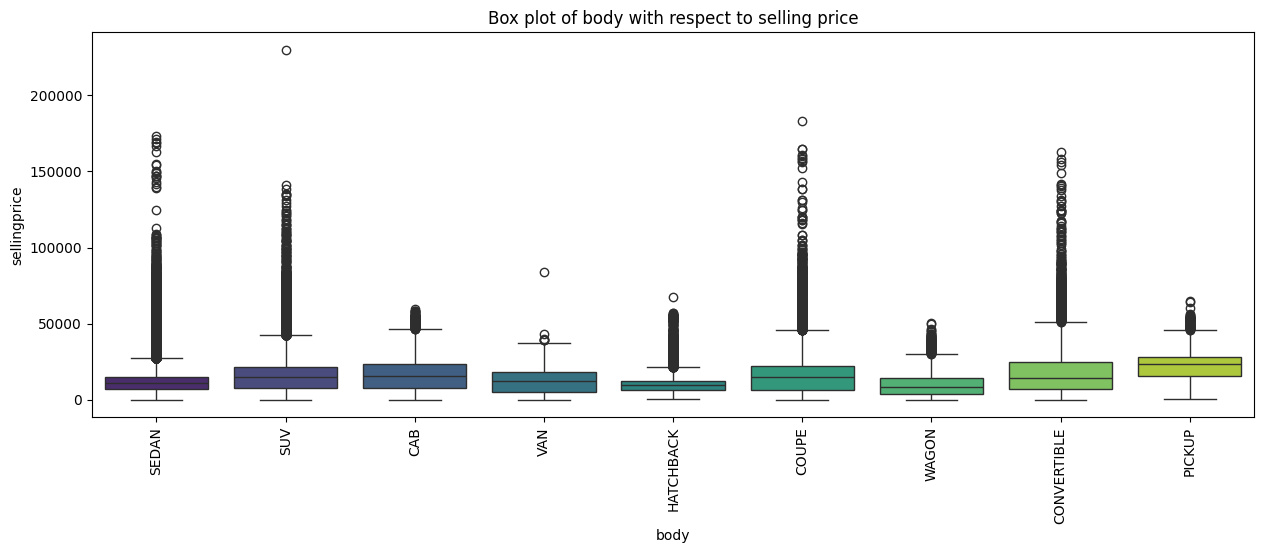

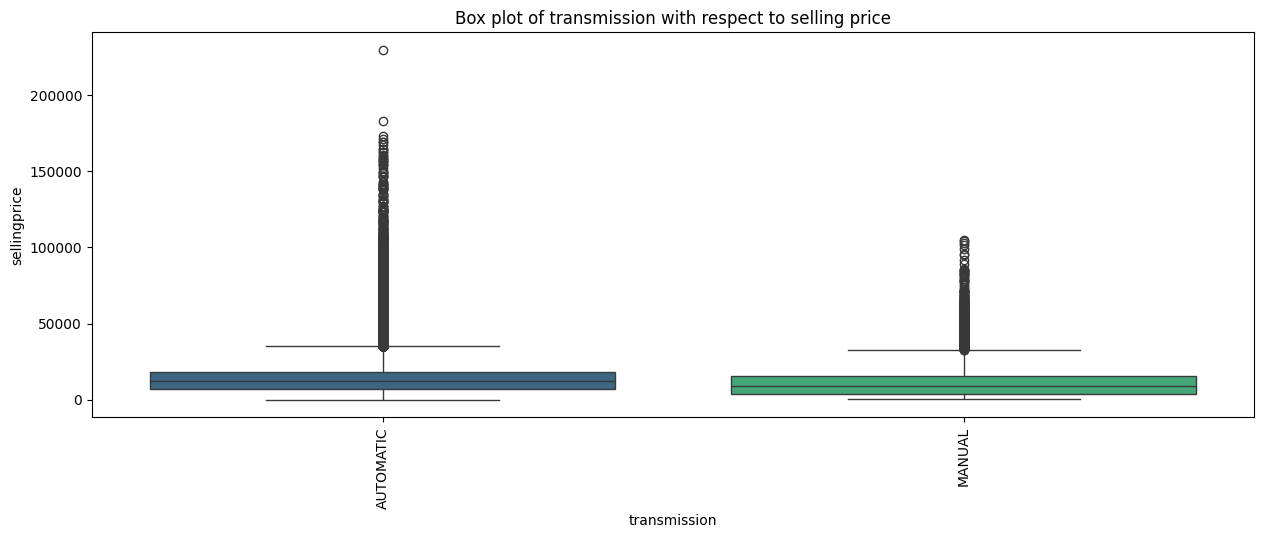

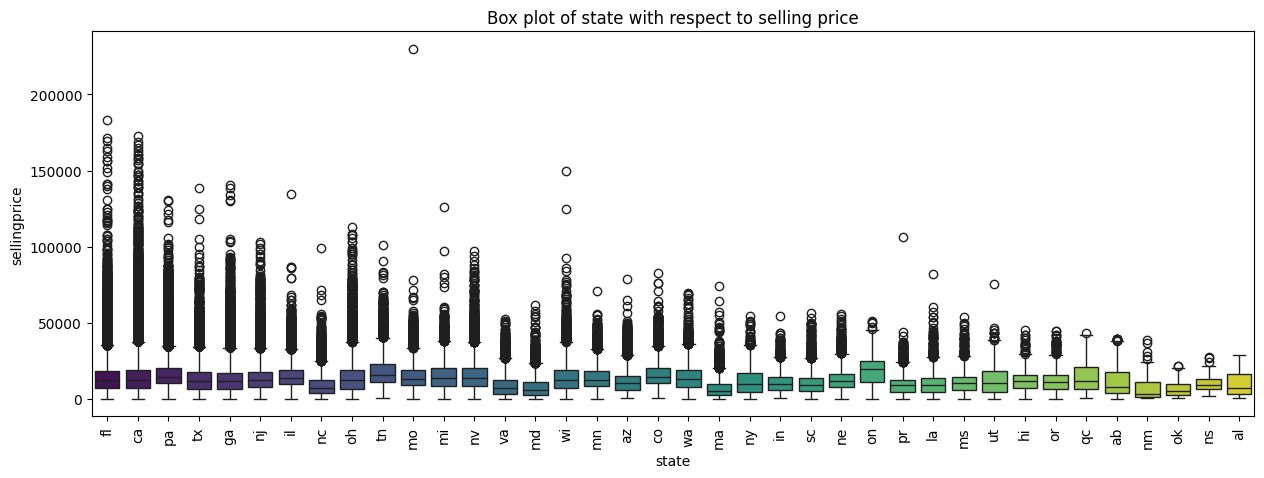

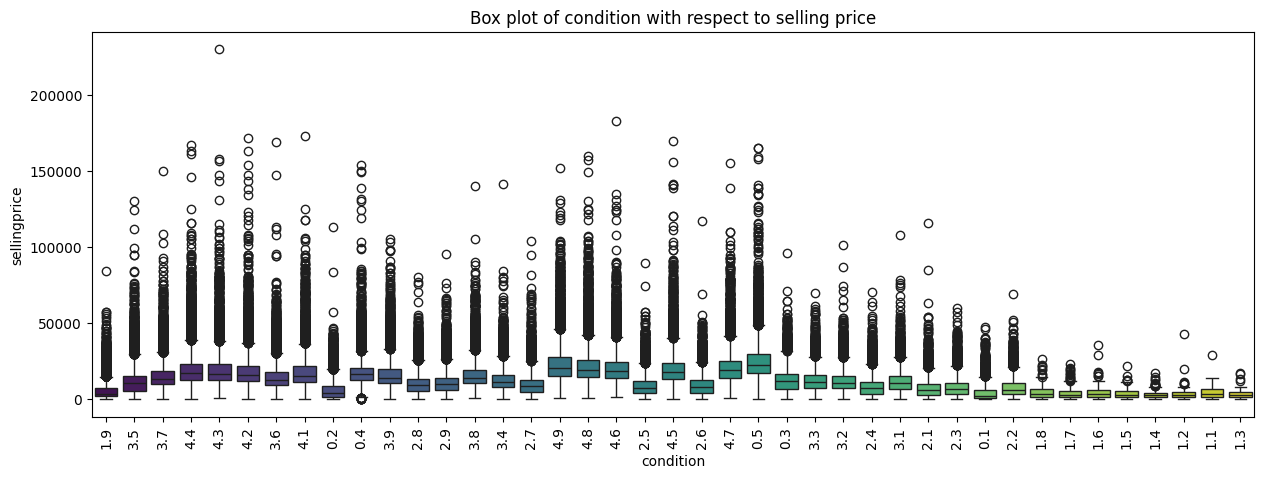

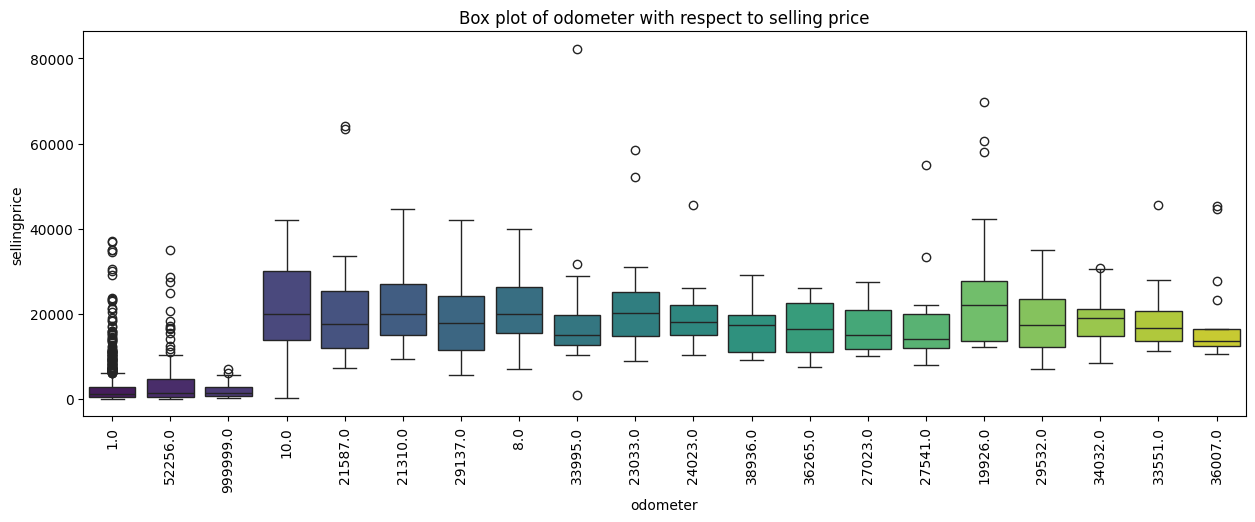

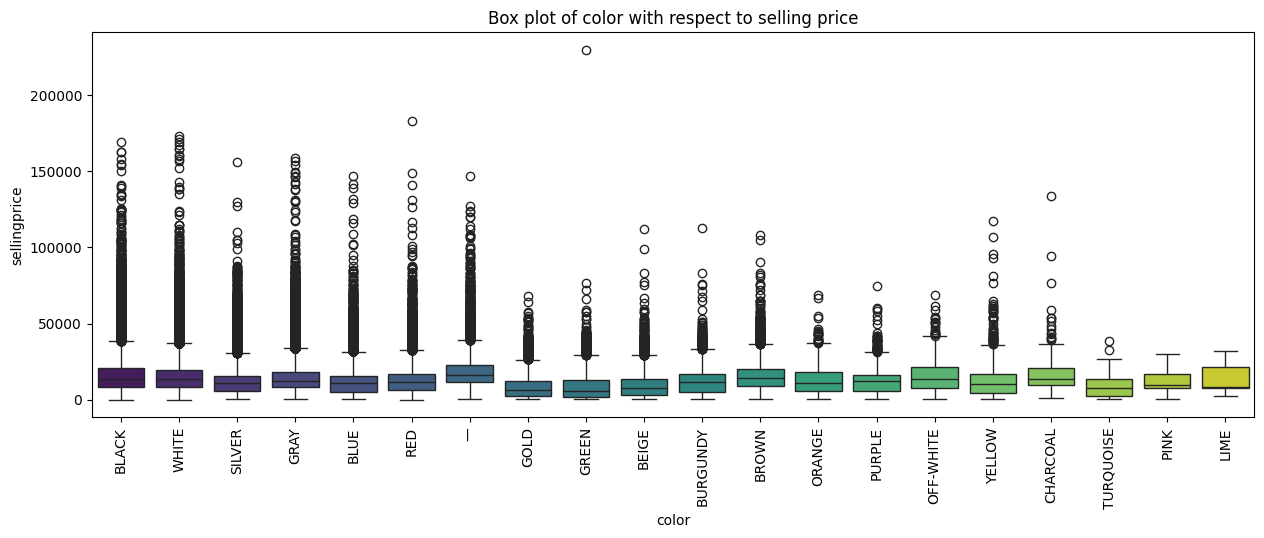

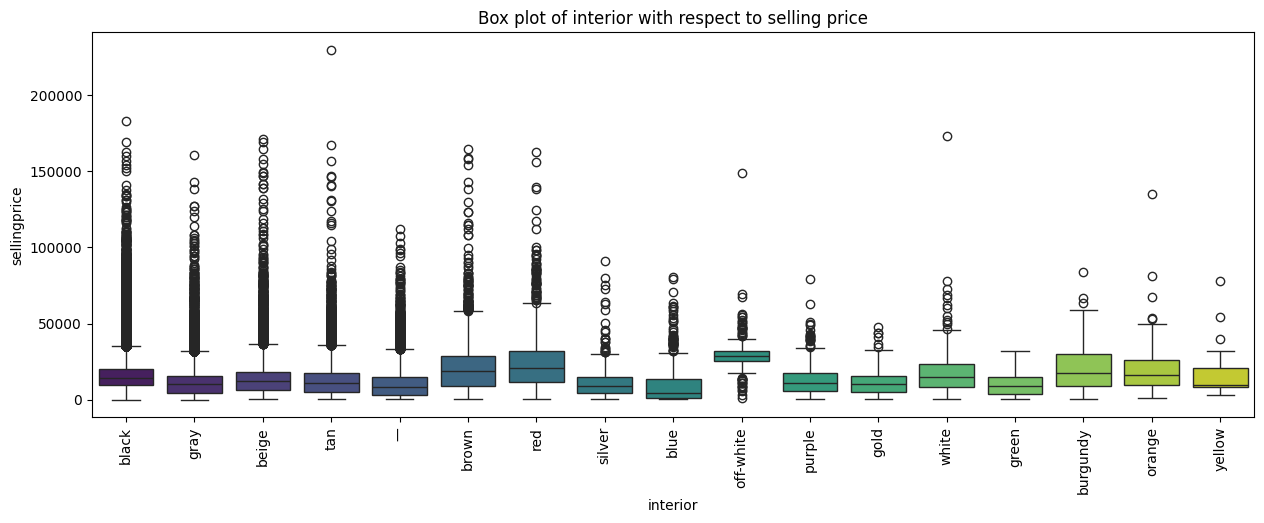

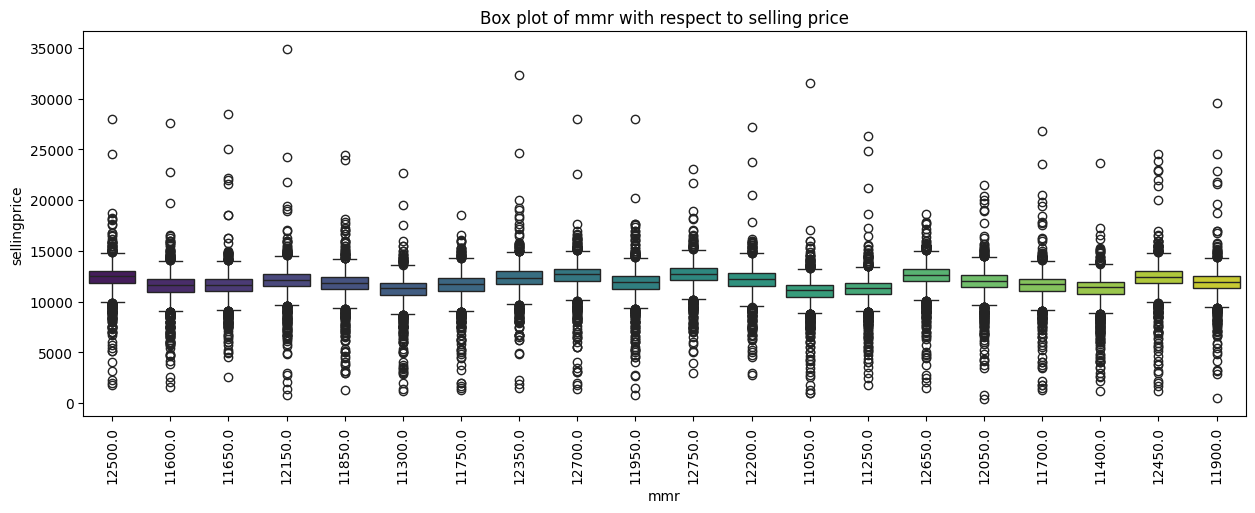

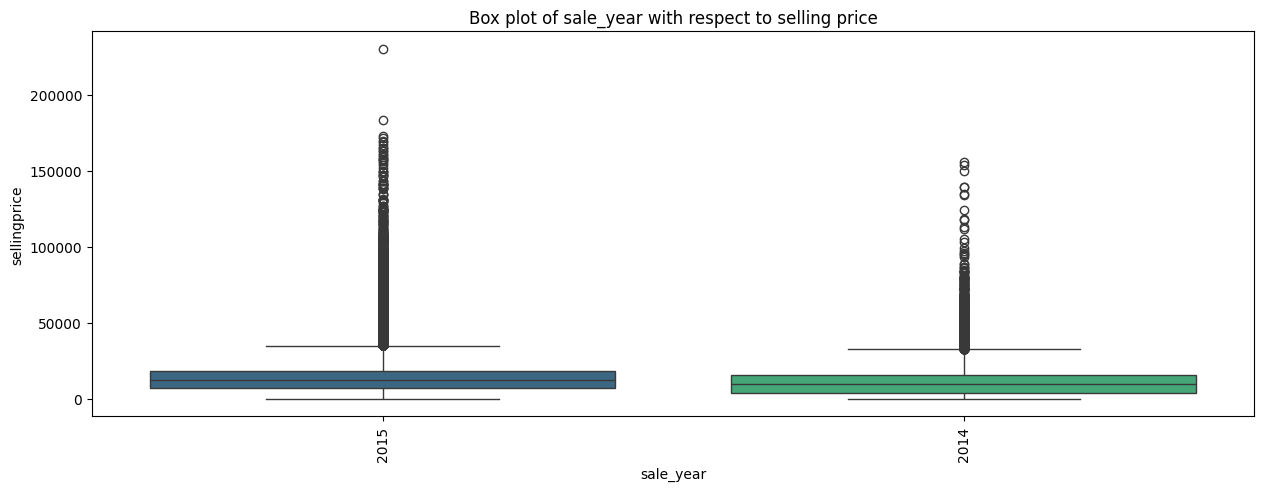

In [54]:
# scatter plot for categorical columns with respect to selling price

for col in df.columns:
    if col != "sellingprice":
        plt.figure(figsize=(15,5))
        plt.title(f"Box plot of {col} with respect to selling price")
        if col == "trim" or col == "model" or col == "odometer" or col == "mmr":
            sns.boxplot(data=df, x=col, y="sellingprice", order=df[col].value_counts().index[:20], palette="viridis")
        else:
            sns.boxplot(data=df, x=col, y="sellingprice", palette="viridis", order=df[col].value_counts().index)
        plt.xticks(rotation=90)
        plt.show()

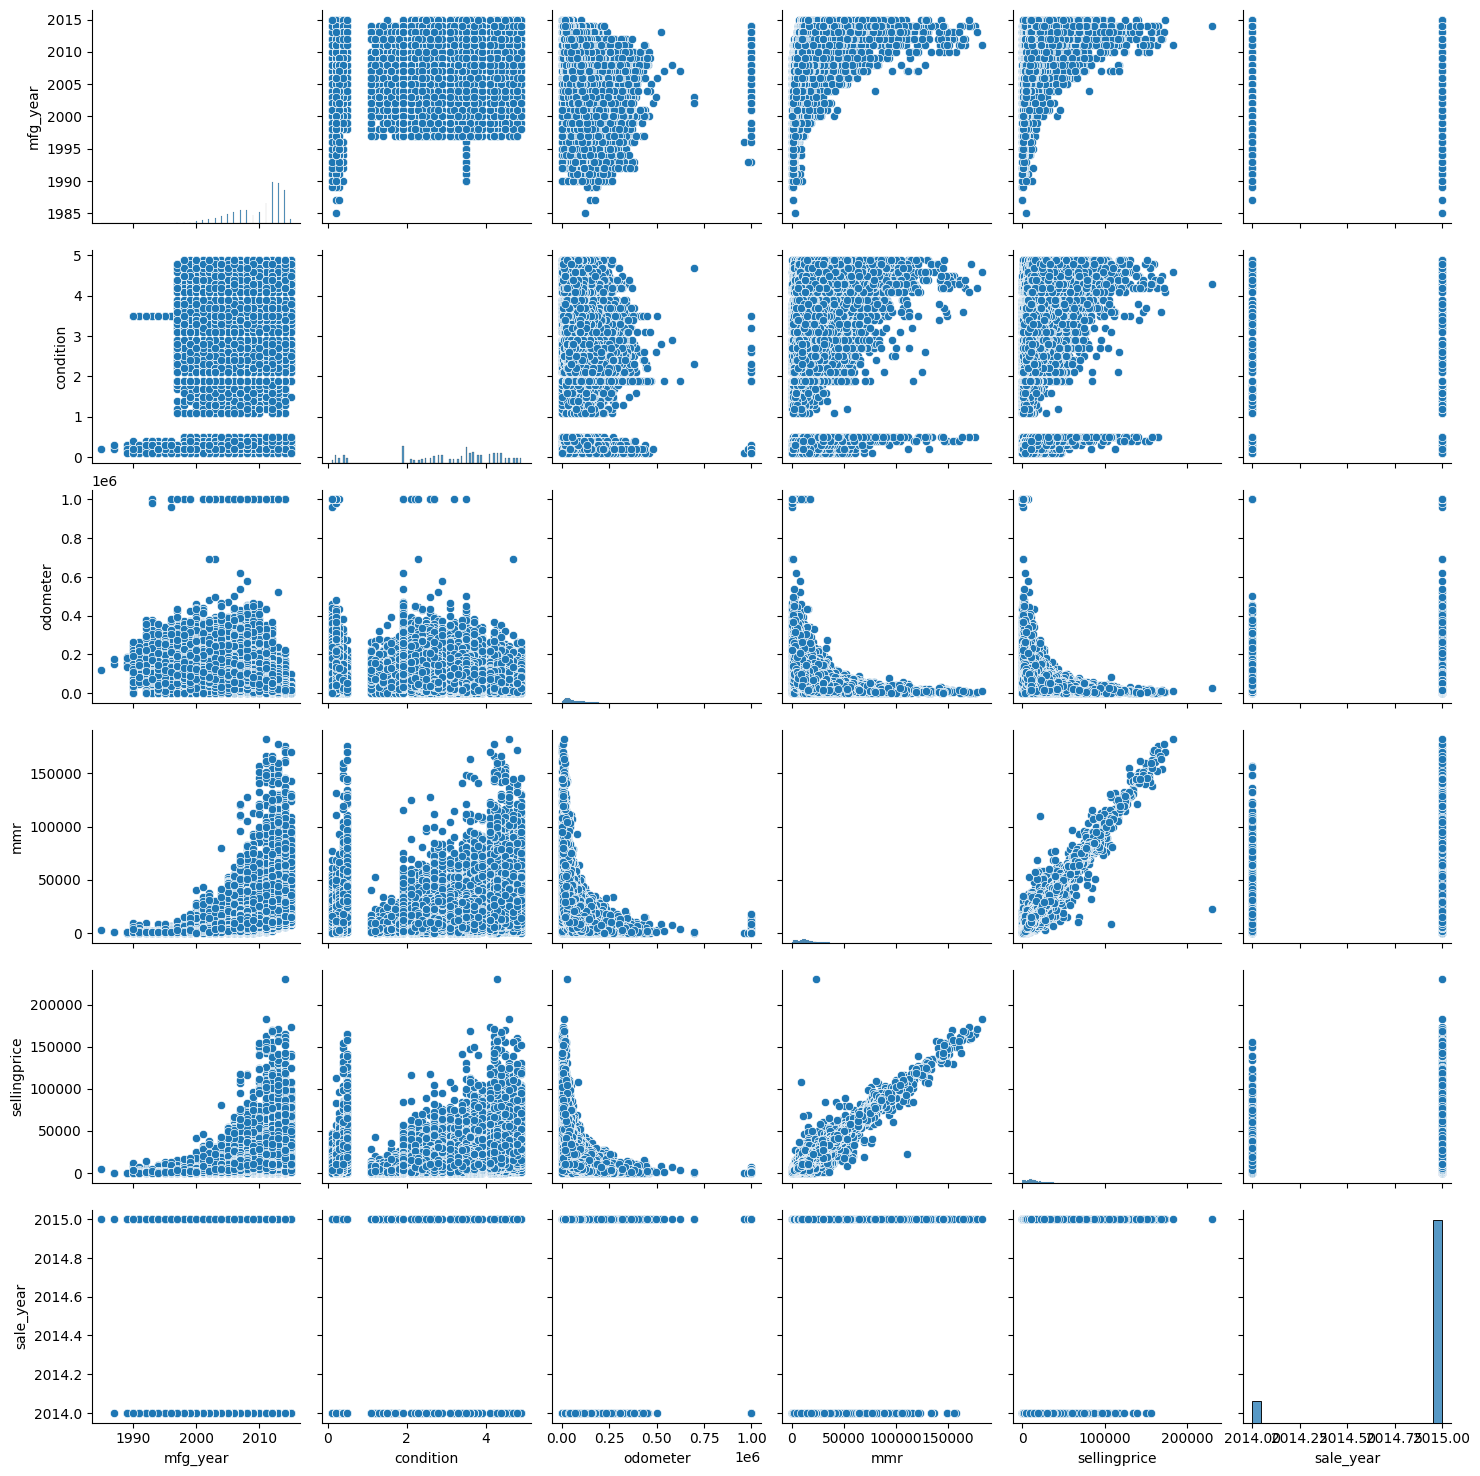

In [55]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

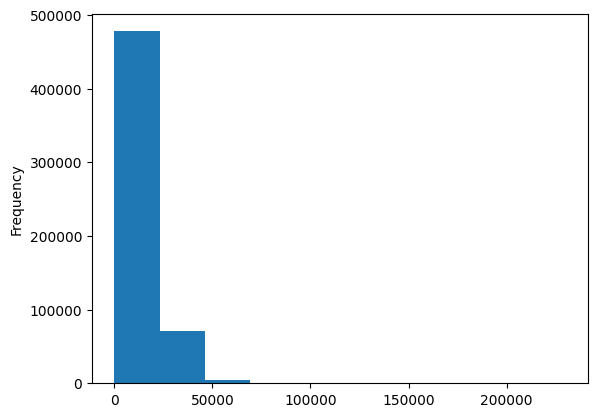

In [56]:
df["sellingprice"].plot(kind="hist", bins=10)

<Axes: ylabel='Density'>

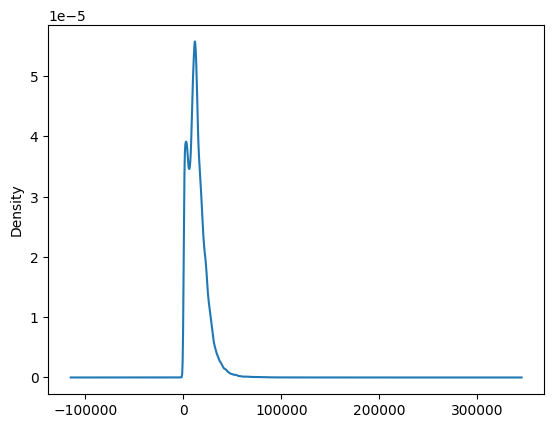

In [57]:
df["sellingprice"].plot(kind="kde")

#### Outlier Removal

In [58]:
df[df["sellingprice"] >= 200000]

,mfg_year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,sale_year
344905,2014,FORD,ESCAPE,TITANIUM,SUV,AUTOMATIC,mo,4.3,27802.0,GREEN,tan,22800.0,230000.0,2015


In [59]:
df.drop(df[df["sellingprice"] >= 200000].index, inplace=True)

#### Reducing data to process in local system

In [60]:
df.shape

(553621, 14)

In [61]:
# Number of rows to remove
rows_to_remove = 533621

# Randomly select rows to drop
df = df.drop(np.random.choice(df.index, rows_to_remove, replace=False))

# Reset index if needed
df = df.reset_index(drop=True)

In [62]:
df.shape

(20000, 14)

In [63]:
categorical_summary_df, numerical_summary_df = get_col_details(df)
categorical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Missing Values %,Not_Null Values,Most Frequent Value,count,unique,top,freq
0,make,object,19953,47,20000,0,0.0,20000,FORD,20000,47,FORD,3387
1,model,object,19406,594,20000,0,0.0,20000,ALTIMA,20000,594,ALTIMA,731
2,trim,object,19100,900,20000,0,0.0,20000,BASE,20000,900,BASE,2023
3,body,object,19991,9,20000,0,0.0,20000,SEDAN,20000,9,SEDAN,9142
4,transmission,object,19998,2,20000,0,0.0,20000,AUTOMATIC,20000,2,AUTOMATIC,19302
5,state,object,19962,38,20000,0,0.0,20000,fl,20000,38,fl,2981
6,color,object,19980,20,20000,0,0.0,20000,BLACK,20000,20,BLACK,3980
7,interior,object,19983,17,20000,0,0.0,20000,black,20000,17,black,8886


In [64]:
numerical_summary_df

,Column Name,Column dtype,Duplicate Values,Unique Values,Total Values,Missing Values,Not_Null Values,count,mean,std,min,25%,50%,75%,max
0,mfg_year,int64,19975,25,20000,0,20000,20000.0,2010.11965,3.899499,1991.0,2008.0,2012.0,2013.0,2015.0
1,condition,float64,19961,39,20000,0,20000,20000.0,3.084415,1.324216,0.1,2.4,3.5,4.1,4.9
2,odometer,float64,1443,18557,20000,0,20000,20000.0,67349.5127,52322.630822,1.0,27858.0,51578.5,97806.5,999999.0
3,mmr,float64,19048,952,20000,0,20000,20000.0,13810.67375,9501.589485,25.0,7300.0,12400.0,18350.0,166000.0
4,sellingprice,float64,19261,739,20000,0,20000,20000.0,13652.2381,9550.97575,1.0,7000.0,12300.0,18250.0,167000.0
5,sale_year,Int64,19998,2,20000,0,20000,20000.0,2014.90125,0.298334,2014.0,2015.0,2015.0,2015.0,2015.0


#### Saving cleaned data

In [65]:
df.to_csv("../Data/cleaned_Data.csv", index=False)

In [66]:
df.head()

,mfg_year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,sale_year
0,2014,BMW,3 SERIES,328I SULEV,SEDAN,AUTOMATIC,ca,4.5,1331.0,GRAY,black,31900.0,30000.0,2015
1,2015,VOLVO,S60,T5,SEDAN,AUTOMATIC,ca,4.1,14282.0,WHITE,black,27500.0,27750.0,2015
2,2014,AUDI,A6,3.0T PRESTIGE QUATTRO,SEDAN,AUTOMATIC,ca,4.8,14414.0,BLACK,black,47300.0,49750.0,2014
3,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,ca,4.8,10357.0,SILVER,gray,20700.0,20500.0,2014
4,2014,CHEVROLET,CAMARO,LT,COUPE,AUTOMATIC,ca,0.1,20595.0,RED,gray,20800.0,13600.0,2014


#### Extracting schema from data

In [2]:
import pandas as pd
import yaml

# Load CSV data
df = pd.read_csv("../Data/cleaned_Data.csv")

# Store column info
columns_info = {col: str(df[col].dtype) for col in df.columns}

# Separate numerical columns into integers and floats
numerical_columns = {}

for col in df.select_dtypes(exclude="O"):
    if pd.api.types.is_integer_dtype(df[col]):
        numerical_columns[col] = {
            "min": int(df[col].min()),
            "max": int(df[col].max()),
            "type": "int"
        }
    else:
        numerical_columns[col] = {
            "min": float(df[col].min()),
            "max": float(df[col].max()),
            "type": "float"
        }

# Store categorical columns
categorical_columns = {
    col: df[col].unique().tolist()
    for col in df.select_dtypes(include="O")
}

# Define schema
schema = {
    "columns": columns_info,
    "numerical": numerical_columns,
    "categorical": categorical_columns
}

# Convert to YAML format
schema_yaml = yaml.dump(schema, default_flow_style=False, sort_keys=False)

# Save to file
with open("../Schema/data_schema.yaml", "w") as f:
    f.write(schema_yaml)

# Print the YAML output
print(schema_yaml)

columns:
  mfg_year: int64
  make: object
  model: object
  trim: object
  body: object
  transmission: object
  state: object
  condition: float64
  odometer: float64
  color: object
  interior: object
  mmr: float64
  sellingprice: float64
  sale_year: int64
numerical:
  mfg_year:
    min: 1991
    max: 2015
    type: int
  condition:
    min: 0.1
    max: 4.9
    type: float
  odometer:
    min: 1.0
    max: 999999.0
    type: float
  mmr:
    min: 25.0
    max: 166000.0
    type: float
  sellingprice:
    min: 1.0
    max: 167000.0
    type: float
  sale_year:
    min: 2014
    max: 2015
    type: int
categorical:
  make:
  - BMW
  - VOLVO
  - AUDI
  - KIA
  - CHEVROLET
  - ACURA
  - HYUNDAI
  - INFINITI
  - NISSAN
  - MERCEDES-BENZ
  - LAND ROVER
  - VOLKSWAGEN
  - FORD
  - HONDA
  - JAGUAR
  - MINI
  - JEEP
  - LINCOLN
  - LEXUS
  - PORSCHE
  - TOYOTA
  - DODGE
  - CHRYSLER
  - MAZDA
  - RAM
  - CADILLAC
  - SUBARU
  - GMC
  - PONTIAC
  - SATURN
  - SUZUKI
  - SCION
  - BUICK
  -